In [1]:
pip install h5py

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/86/43/fd0bd74462b3c3fb35d98568935d3e5a435c8ec24d45ef408ac8869166af/h5py-3.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 68.5 MB/s eta 0:00:00:00:010:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyserial

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pyserial from https://files.pythonhosted.org/packages/07/bc/587a445451b253b285629263eb51c2d8e9bcea4fc97826266d186f96f558/pyserial-3.5-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 16.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Imports, etc.

In [1]:
import glob 
import numpy as np
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pylab as plt
import datetime
from scipy.signal import butter, welch, filtfilt, periodogram, savgol_filter
import time
import pandas as pd
import sys
import os
import re
from time import sleep
import serial
import json

In [6]:
import pysmurf.client
import matplotlib.pylab as plt
%matplotlib inline  

epics_prefix="smurf_server_s3"
config_file=os.path.abspath("/usr/local/src/pysmurf/cfg_files/stanford/experiment_fp31_cc03-02_lbOnlyBay0.cfg")

S = pysmurf.client.SmurfControl(epics_root=epics_prefix,cfg_file=config_file,setup=True,make_logfile=True,shelf_manager="shm-smrf-sp01")
logfile = S.log.logfile.name
print(logfile)

/data/smurf_data/20240918/1726617919/outputs/1726617919.log


In [3]:
print(S.slot_number)

0


Rogue Version: v4.11.11


In [4]:
print('Pysmurf Client Version:',pysmurf.__version__)
print('Rogue Version:',S._caget(f'{epics_prefix}:AMCc:RogueVersion', as_string=True))
print('Pysmurf Core Version:', S._caget(f'{epics_prefix}:AMCc:SmurfApplication:SmurfVersion', as_string=True))
print('FPGA Git Hash Short:', S.get_fpga_git_hash_short())
print('Config file:', S.config.filename)
print('Cryocard FW Version:', S.C.get_fw_version())

Pysmurf Client Version: 8.0.0-rc3+12.gc1067044.dirty
Rogue Version: v4.11.11
Pysmurf Core Version: 8.0.0-rc3+12.gc1067044
FPGA Git Hash Short: e54bbcc
Config file: /usr/local/src/pysmurf/cfg_files/stanford/experiment_fp31_cc03-02_lbOnlyBay0.cfg
Cryocard FW Version: (0, 0, 0)


In [5]:
os.chdir('/usr/local/src/pysmurf/scratch/smithzj/')
print(os.getcwd())
from ResonanceFitter import *
from KID_meas import *
from noise_utils import *
from instr_control.awg_control import send_command, query_instrument
from instr_control.awg_helpers import create_waveform

/usr/local/src/pysmurf/scratch/smithzj
/usr/local/src/pysmurf/scratch/smithzj


In [75]:
S.set_timing_mode('fiber')
S.get_timing_mode()

'fiber'

## Initializing SMuRF


In [6]:
BAND = 2

In [12]:
print(S.get_att_uc(BAND))
S.set_att_uc(BAND, 0)
print(S.get_att_uc(BAND))

Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
None
Function set_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
None


Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function set_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function set_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping ca

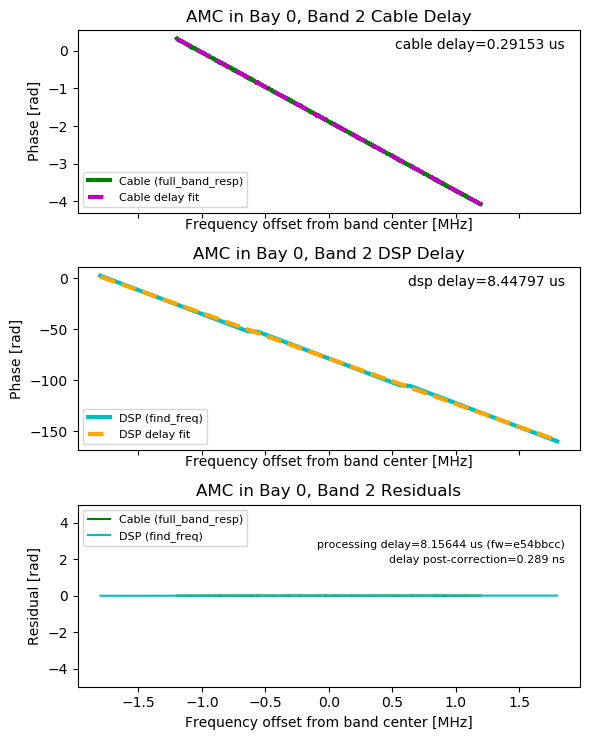

(8.447970856165023, 0.0002893816921236728)

In [38]:
S.estimate_phase_delay(BAND,freq_min=-1200000,freq_max=1200000)

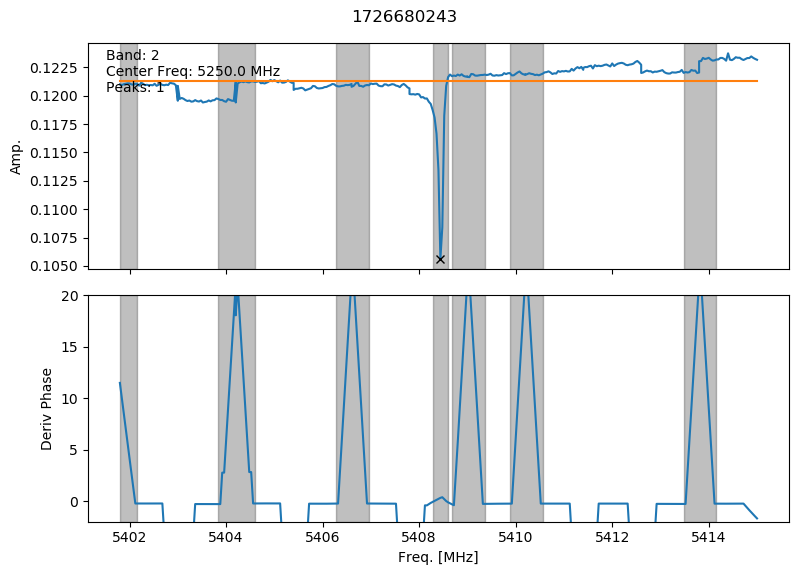

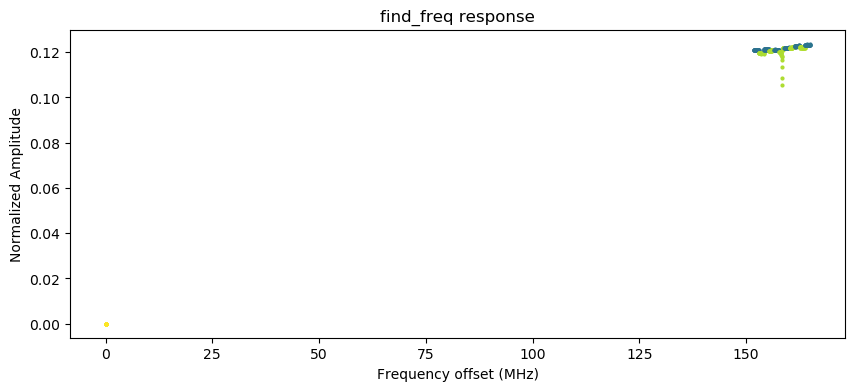

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]))

In [53]:
# 0 dB attn
S.find_freq(2,tone_power=12, start_freq=152,stop_freq=164,make_plot=True,show_plot=True,amp_cut=0.05,rolling_med=False) #amp cut decides what you count for a resonator 

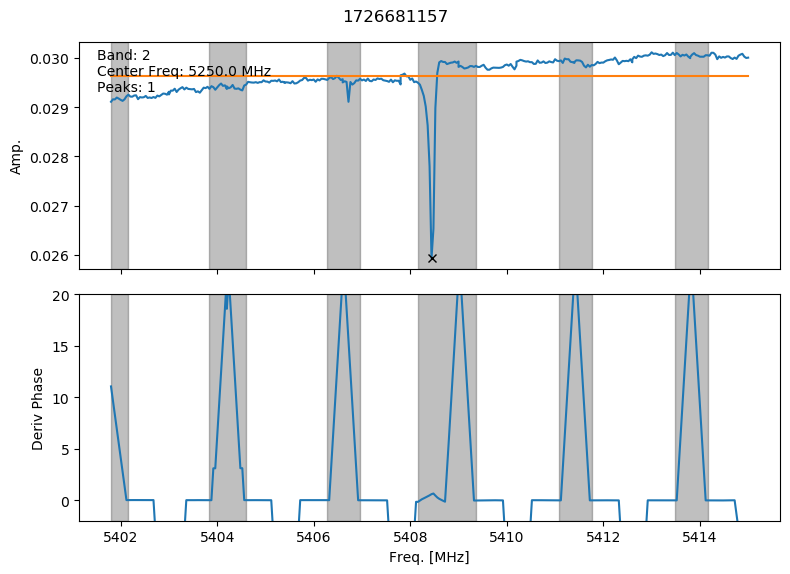

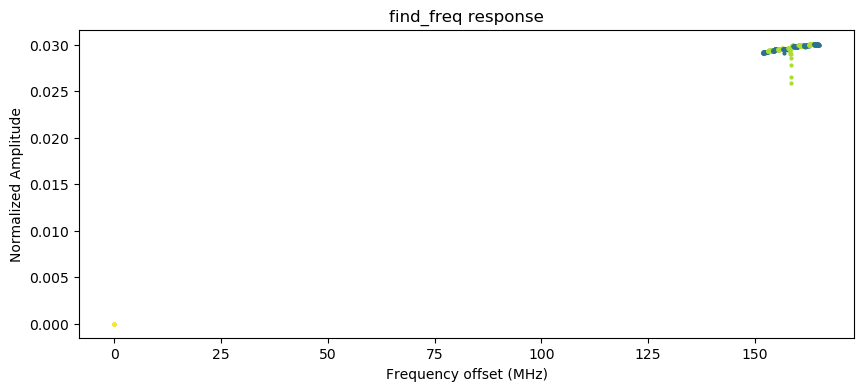

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]))

In [60]:
# 12 dB attn on input
S.find_freq(2,tone_power=12, start_freq=152,stop_freq=164,make_plot=True,show_plot=True,amp_cut=0.05,rolling_med=False) #amp cut decides what you count for a resonator 

In [35]:
S.which_on(2)

array([], dtype=int64)

In [50]:
S.setup_notches(2, new_master_assignment=True)

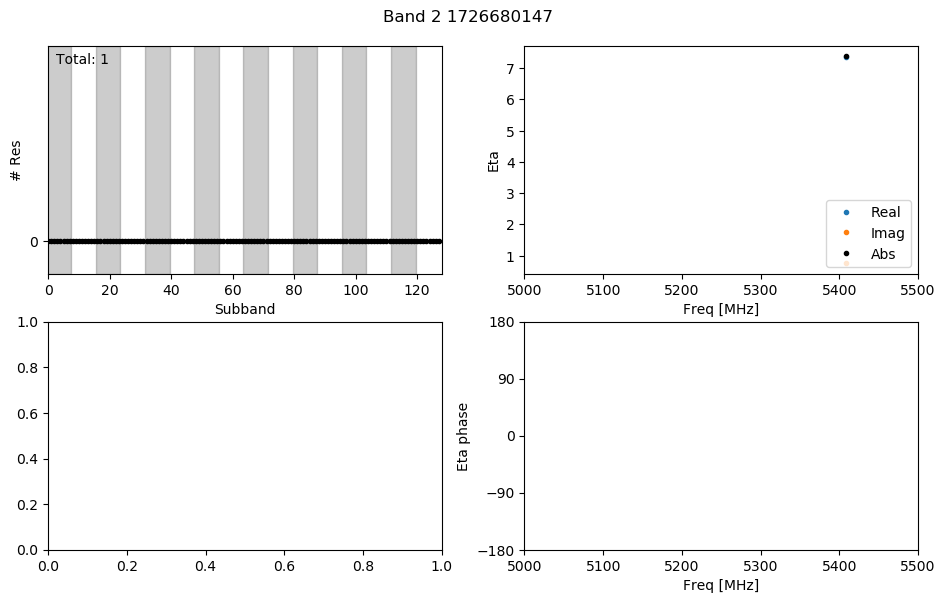

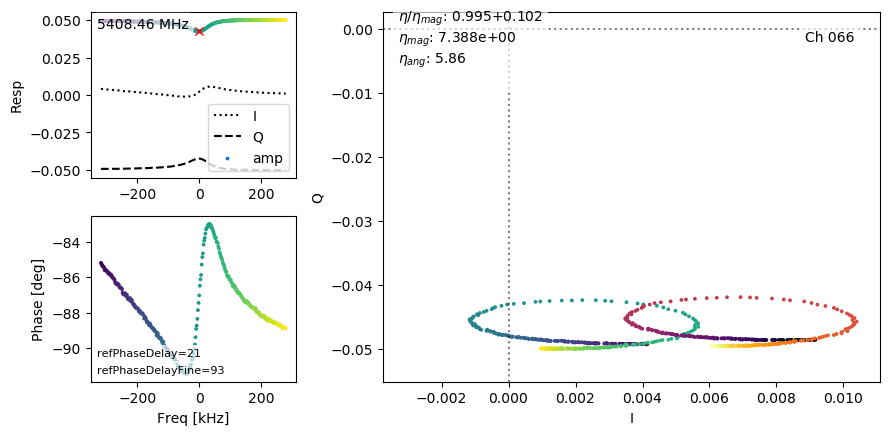

In [51]:
S.plot_tune_summary(2, eta_scan=True, show_plot=True)


Fr from fit  [GHz]: 5408.459173797206
Fr min curve [GHz]: 5408.454
fine_pars: {'f0': 5408.459173797206, 'Qr': 64020.70789090531, 'phi': -0.1981575814856858, 'zOff': (0.0016546466342262616-0.049823180355938614j), 'QcHat': 430291.3376178327, 'tau': (0.027639248758878958+0.003328817840882927j), 'Qc': 438879.8000064961}
Qi: 54681.815923692506
Fit dictionary parameters:   {'f0': 5408.459173797206, 'Qr': 64020.70789090531, 'phi': -0.1981575814856858, 'zOff': (0.0016546466342262616-0.049823180355938614j), 'QcHat': 430291.3376178327, 'tau': (0.027639248758878958+0.003328817840882927j), 'Qc': 438879.8000064961}
Plotting iq, fit, and fr in ideal basis
Plotting iq, fit, and fr in resonator basis


({'f0': 5408.459173797206,
  'Qr': 64020.70789090531,
  'phi': -0.1981575814856858,
  'zOff': (0.0016546466342262616-0.049823180355938614j),
  'QcHat': 430291.3376178327,
  'tau': (0.027639248758878958+0.003328817840882927j),
  'Qc': 438879.8000064961},
 {'f0': 0.00046211109550862783,
  'Qr': 700.3914939281127,
  'phi': 0.00994526693746308,
  'zOff': (2.2209275378831633e-05+1.9683536033694402e-05j),
  'QcHat': 4279.256139202357,
  'tau': (0.00034019194296900594+0.00034017784923160343j),
  'Qc': 4279.467774972963})

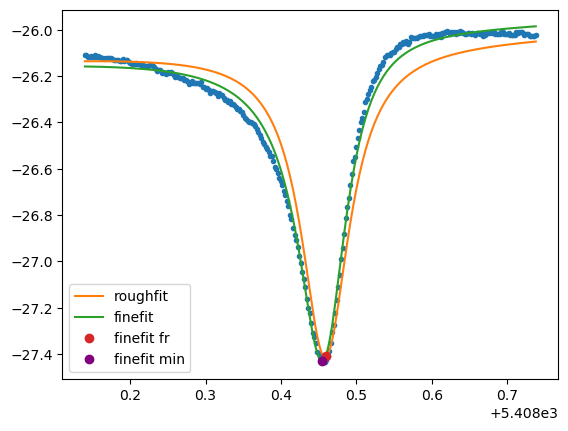

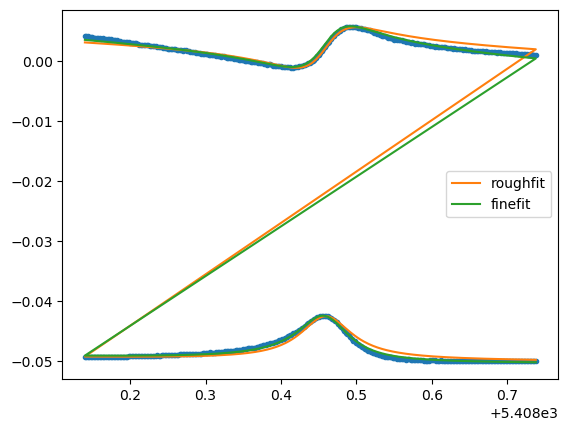

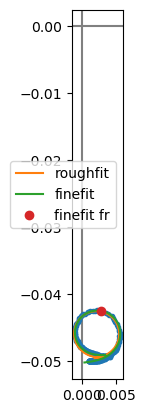

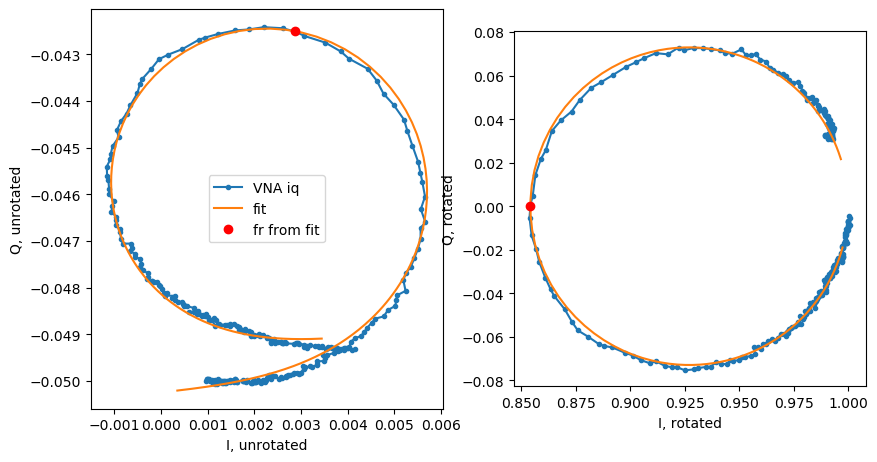

In [52]:
fit_data(S.tune_file, 2)

In [11]:
S.get_timing_mode()

'fiber'

In [10]:
S.set_timing_mode('fiber')

## Initializing AWG: 
https://www.keysight.com/us/en/assets/9018-03925/user-manuals/9018-03925.pdf?success=true

In [23]:
awg = serial.Serial(
    port='/dev/ttyUSB0',       # Replace with your COM port
    baudrate=9600,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_NONE,
    stopbits=serial.STOPBITS_ONE,
    rtscts=True,  # Enable RTS/CTS (hardware handshaking),
    timeout=2)


# Reset and configure the instrument
send_command(awg, '*RST') # reset
send_command(awg,'*CLS')  # clears the error queue
send_command(awg,'FUNC:USER VOLATILE') # Selects a user defined waveform, saved in "volatile memory" 
send_command(awg, 'OUTPut:LOAD 10000') # Set output impedance to 10kOhm to match the LED driver 

In [15]:
##What this does:
## 1. uses find_freq to find the resonant frequencies (in this case the one)
## 2. runs setup_notches which does a fine sweep over frequencies from above and figures out the tones to send.
## 3. runs plot_tune_summary
## 4. prints the band its on
## 5. turns off the channels
## 6. gets the frequency in hertz of the resonance
## 7. uses gradient descent to get to the minimum of the transmission
## 8. Sets the number of frequency error averages to take at each point of the etaScan.
## 9. Does an eta scan serially across the entire band. 
## 10. stop feedback on resonant frequency. Just send 1 fixed tone




## Define some new fitting functions Fit Data

In [46]:
 def fit_data(tune_file, band, db_offset=1):
     
    tune_dict=load_tune_file(tune_file, band, db_offset)
     
    ##fit_tune_file returns two dictionaries, one with fit values and the other with errors. In each the keys are:
        ## f0: the resonant frequency
        ## Qr
        ## phi
        ## zoff (this is "a" in the usual equation form ie ae^{2piitau}....)
        ## QcHat
        ## tau
        ## Qc

    fit_dict, fine_errs = fit_tune_file(tune_dict, plot=True)
    print("Fit dictionary parameters:  ", fit_dict)

    plot_fit(tune_dict, fit_dict)
    
    return fit_dict, fine_errs

In [47]:
def plot_fit(tune_dict, fit_dict):

    ##This is the fit parameters plugged int othe fit function.
    iq_fit = resfunc3(tune_dict['freqs'], fit_dict['f0'], fit_dict['Qr'], fit_dict['QcHat'], fit_dict['zOff'], fit_dict['phi'],fit_dict['tau'])

    ##This is also the fit parameters plugged into the fit function, but the x data is only the resonant frequency (so returns one point).
    iq_res = resfunc3(fit_dict['f0'], fit_dict['f0'], fit_dict['Qr'], fit_dict['QcHat'], fit_dict['zOff'], fit_dict['phi'],fit_dict['tau'])

    ## This is the data rotated to the ideal basis
    VNA_ideal_basis = rotate_to_ideal_compact(tune_dict, fit_dict)
    ## This is the fit rotated to the ideal basis.
    fit_ideal_basis = rotate_to_ideal_semi_compact(iq_fit, tune_dict['freqs'], fit_dict)
    ## This is the resonance from the fit rotated to the ideal basis.
    iq_res_rotated = rotate_to_ideal_semi_compact(iq_res,  fit_dict['f0'], fit_dict)

    ## This is the frequency and dissipation basis values, from both the fit and the data.
    VNA_freq, VNA_diss = resonator_basis(VNA_ideal_basis, fit_dict, axis=None)
    fit_freq, fit_diss = resonator_basis(fit_ideal_basis, fit_dict, axis=None)
    iq_res_freq, iq_res_diss = resonator_basis(iq_res_rotated, fit_dict, axis=None)

    fig,axs = plt.subplots(ncols=2, figsize=(10, 10) )#sharex=True, sharey=True)

    print("Plotting iq, fit, and fr in ideal basis")
    axs[0].plot(tune_dict['r'].real, tune_dict['r'].imag,'C0.-', label='VNA iq')
    axs[0].plot(iq_fit.real, iq_fit.imag,'C1-', label='fit')
    axs[0].plot(iq_res.real, iq_res.imag, 'ro', label='fr from fit')
    axs[0].legend()

    print("Plotting iq, fit, and fr in resonator basis")
    axs[1].plot(VNA_ideal_basis.real, VNA_ideal_basis.imag,'C0.-', label='VNA iq in ideal basis')
    axs[1].plot(fit_ideal_basis.real, fit_ideal_basis.imag,'C1-', label='rotated fit')
    axs[1].plot(iq_res_rotated.real, iq_res_rotated.imag, 'ro', label='rotated fr from fit')
    
    
    axs[0].set_aspect('equal')
    axs[1].set_aspect('equal')
    axs[0].set_ylabel("Q, unrotated")
    axs[1].set_ylabel("Q, rotated")
    axs[0].set_xlabel("I, unrotated")
    axs[1].set_xlabel("I, rotated")
    
    return None

In [17]:
def logDebugData(S, band, channel, iq, sync, filename, tunefile, cooldown_str, char_avgs={}, awg_settings={}, led_settings={}, MEMS_settings={}):
    freq_in_Hz = get_freq_in_Hz(S, band=band, channel=channel)
    eta_phase_degree = S.get_eta_phase_degree_channel(band,channel)
    eta_phase_rad = np.deg2rad(eta_phase_degree)
    fs = S.get_channel_frequency_mhz(band) * 1.0E6 #For this mode of smurf, channel_freq is sample rate
    att_uc = S.get_att_uc(band)
    att_dc = S.get_att_dc(band)    

            
    amplitude_scale_array = S.get_amplitude_scale_array(band).tolist()
    channels = []
    for i in range(len(amplitude_scale_array)):
        if amplitude_scale_array[i] != 0:
            channels.append(i)
            

    data_dict = {}
    data_dict['band'] = band
    data_dict['channels'] = channels
    data_dict['filename'] = filename
    data_dict['nsamp'] = len(iq.real)
    data_dict['freq_in_Hz'] = freq_in_Hz
    data_dict['eta_phase_rad'] = eta_phase_rad.tolist()
    data_dict['fs'] = fs
    data_dict['amplitude_scale_array'] = amplitude_scale_array
    data_dict['att_uc'] = att_uc
    data_dict['att_dc'] = att_dc
    data_dict['tunefile']=tunefile
    data_dict['awg_settings']=awg_settings
    data_dict['char_avgs']= char_avgs
    data_dict['cooldown_str']= cooldown_str
    data_dict['MEMS'] = MEMS_settings
    data_dict['led_settings'] = led_settings

    S.log("JSON DICT FOR " + filename)
    S.log(json.dumps(data_dict))

"""
    Loads the debug data from the logfile into a dictionary. Returns the dictionary.
"""

'\n    Loads the debug data from the logfile into a dictionary. Returns the dictionary.\n'

# Now take pulse data 

## Sequence 1

+1.0000000000000E+04
()


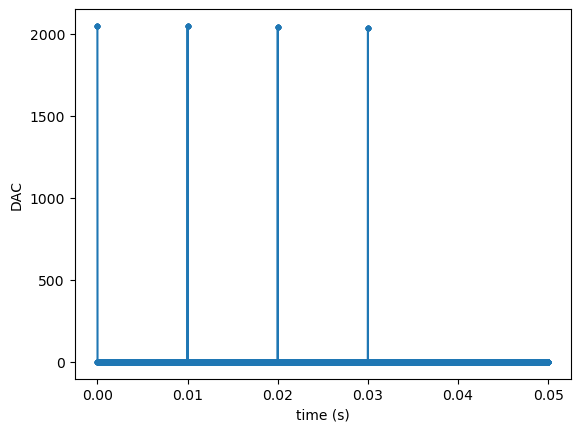

downloading waveform to volatile memory
Time taken to download wavefunction: 417.005587 seconds


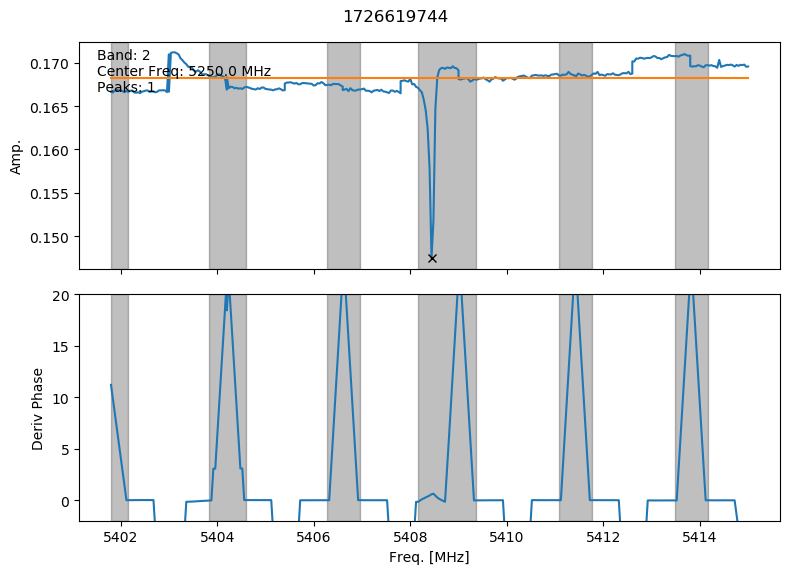

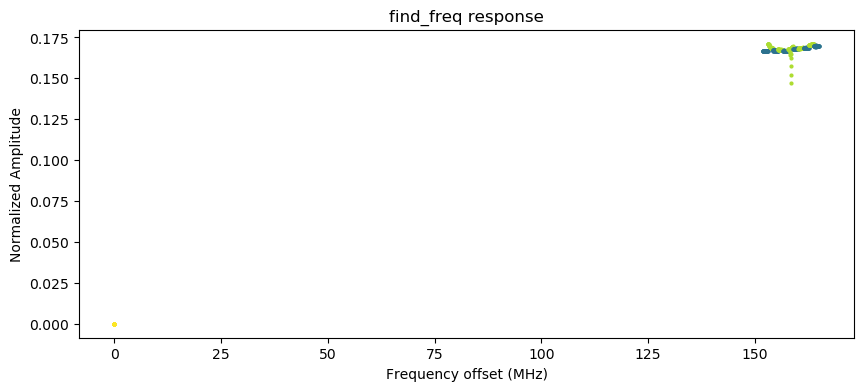

S.which_on(2)=[66]
turning off non resonant channels...
S.which_on(2)=[66]
sb=387 sbc=158.4 bc=5250.0
fr=5408.453999948501 MHz
S.get_eta_mag_scaled_channel=0.9999857245856825
S.get_eta_phase_degree_channel=-24.199681352319054
sb=387 sbc=158.4 bc=5250.0
fr=5408.453915834427 MHz
Fr from fit  [GHz]: 5408.451978812972
Fr min curve [GHz]: 5408.451999999999
fine_pars: {'f0': 5408.451978812972, 'Qr': 56036.60893355335, 'phi': -0.007664346078039577, 'zOff': (0.0713829480790076-0.1540443939175895j), 'QcHat': 370968.95817470126, 'tau': (0.02992434773744347-0.0037020431094027468j), 'Qc': 370979.854207908}
Qi: 47572.26375374155
Fit dictionary parameters:   {'f0': 5408.451978812972, 'Qr': 56036.60893355335, 'phi': -0.007664346078039577, 'zOff': (0.0713829480790076-0.1540443939175895j), 'QcHat': 370968.95817470126, 'tau': (0.02992434773744347-0.0037020431094027468j), 'Qc': 370979.854207908}
Plotting iq, fit, and fr in ideal basis
Plotting iq, fit, and fr in resonator basis
turned AWG output off
taki

/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 262144 is greater than input length  = 32768, using nperseg = 32768
  warnings.warn('nperseg = {0:d} is greater than input length '


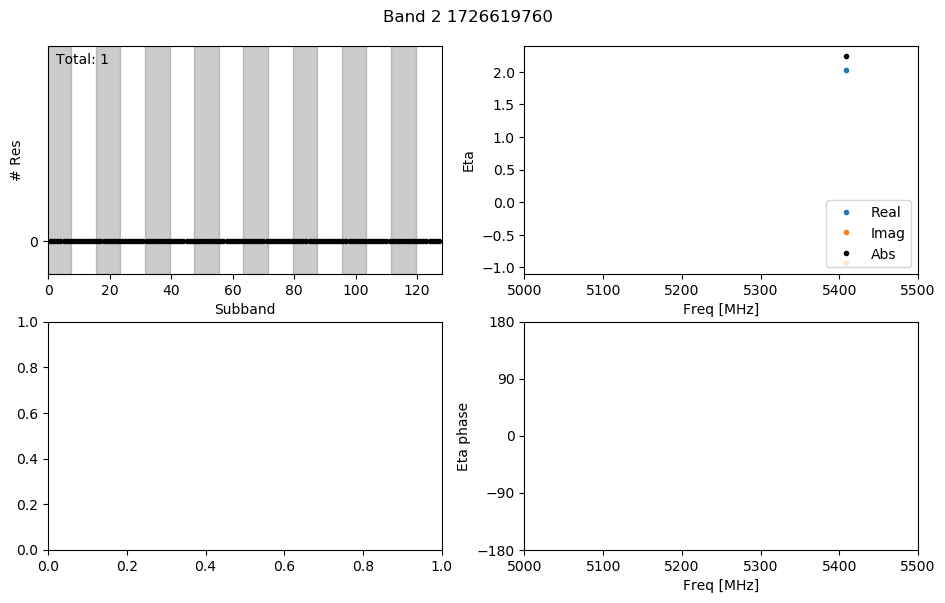

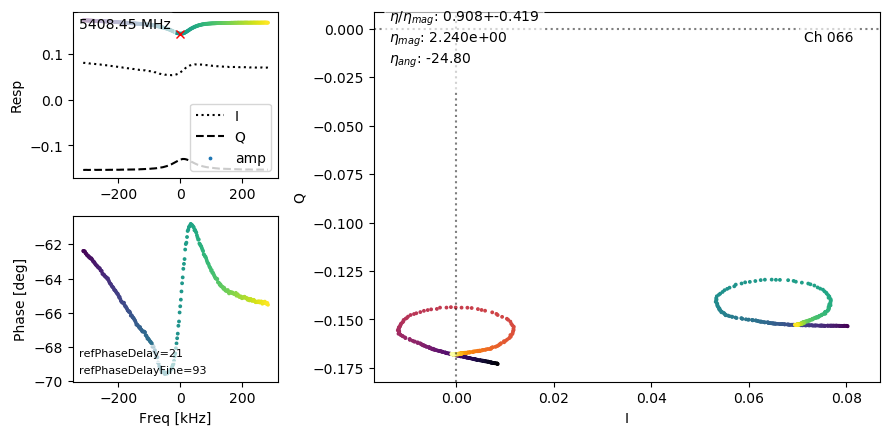

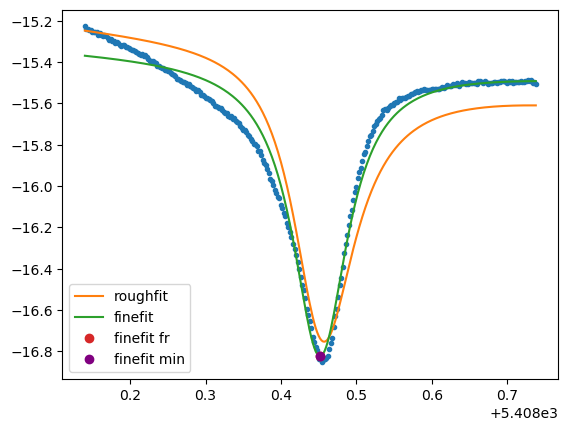

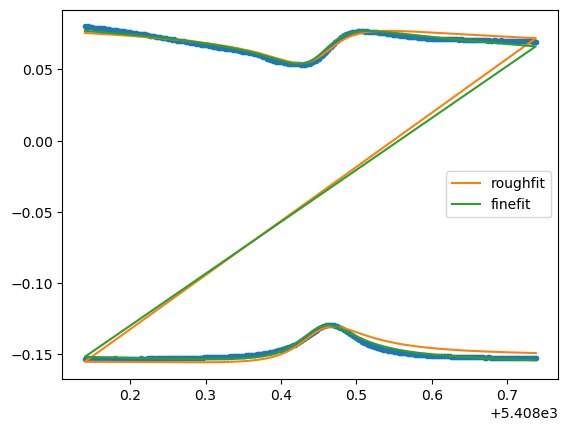

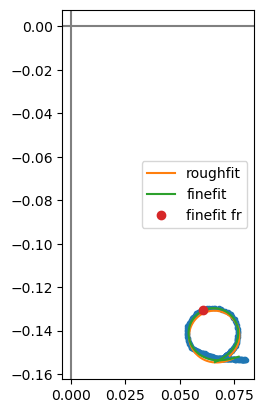

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


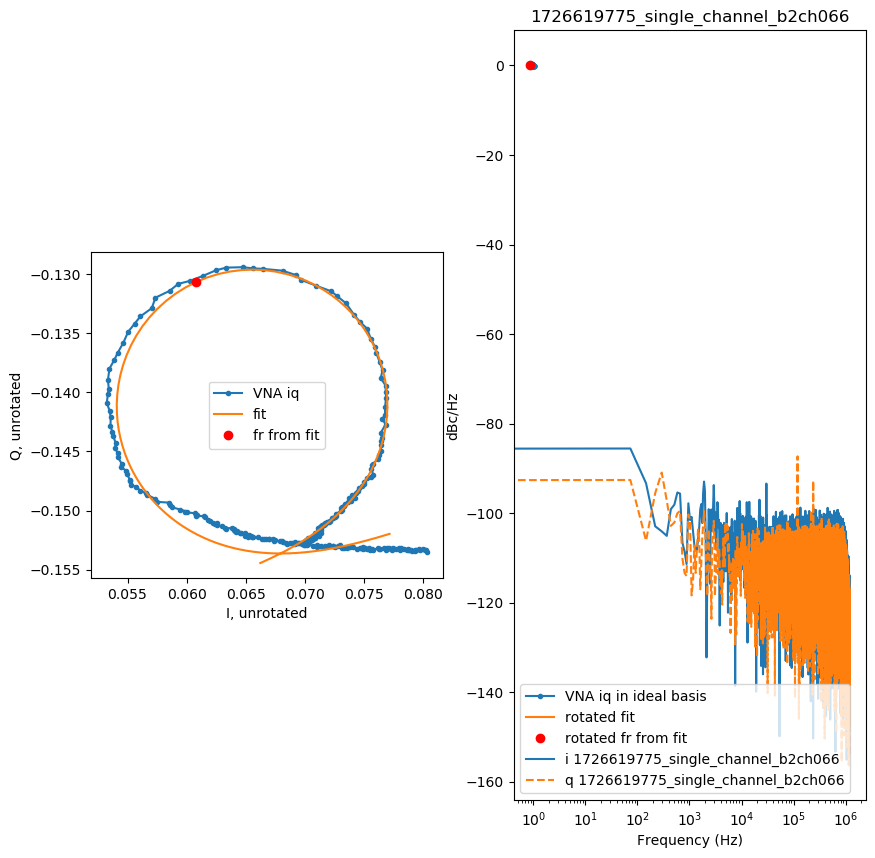

<Figure size 640x480 with 0 Axes>

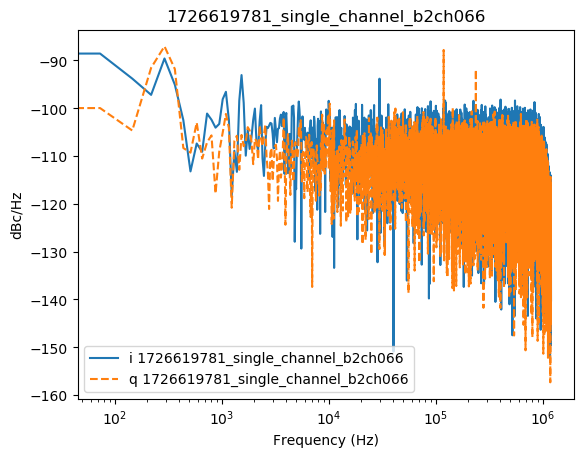

<Figure size 640x480 with 0 Axes>

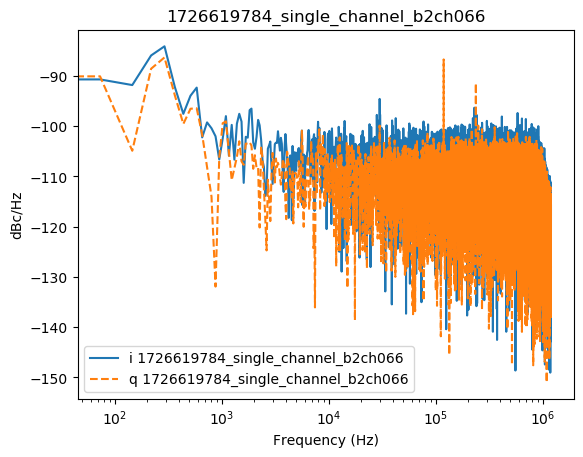

<Figure size 640x480 with 0 Axes>

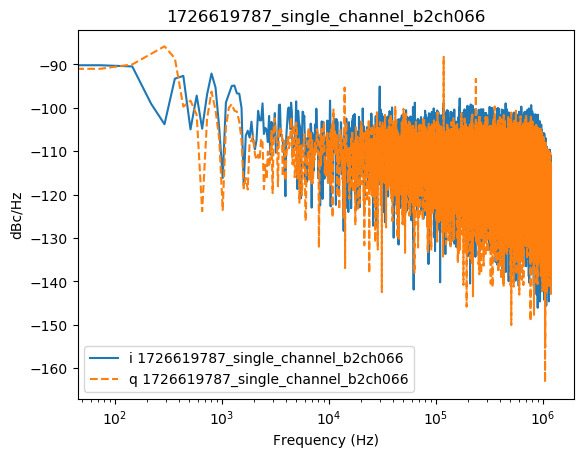

<Figure size 640x480 with 0 Axes>

Turning on LED...
turned AWG output on
taking on resonance data


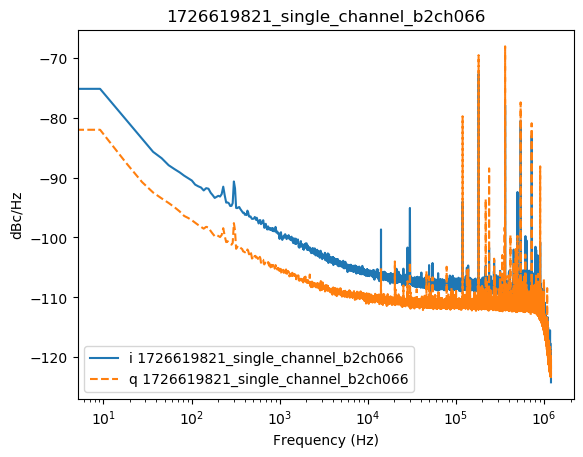

<Figure size 640x480 with 0 Axes>

Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
turned AWG output off


In [25]:
##################  Define USER SET Parameters
# AWG: 
WVFM_DURATION_S = 50e-3  
WVFM_SAMPLES = 50000
WVFM_SAMP_RATE_HZ = WVFM_SAMPLES / WVFM_DURATION_S

VOLT = 0.83
FREQ = 1/WVFM_DURATION_S #HZ

PULSE_DURATION_US = [10 , 10, 10, 10, 10] # Duration of each square wave in microseconds
AMPLITUDES = [1, .999, .998, .995, 0]  # Example amplitudes for the 5 segments

AWG_settings = {}
AWG_settings["pulse_duration_us"] = PULSE_DURATION_US
AWG_settings["amplitudes"] = AMPLITUDES
AWG_settings["wvfm_samp_rate_hz"] = WVFM_SAMP_RATE_HZ
AWG_settings["wvfm_duration_s"] = WVFM_DURATION_S
AWG_settings["voltage"] = VOLT
AWG_settings['impedance'] = query_instrument(awg, 'OUTPut:LOAD?', response_return=True)

waveform_string = create_waveform(PULSE_DURATION_US, AMPLITUDES, WVFM_SAMP_RATE_HZ, WVFM_DURATION_S, dac_max=2047, plot=True) 
DOWNLOAD_2_VOLATILE = True  #did you make changes in wvfm srtring 


# LED: 
LED_settings = {}
LED_settings['P/N'] = 'M625F2'
LED_settings['wavelength (nm)'] = 625
LED_settings['current limit (mA)'] = 500
LED_settings['Vmax (V)'] = 5
LED_settings['mod coeff  (mA/V)'] = 400
LED_settings['input impedance (kOhm)'] = 10



# SMuRF: 
SMURF_SAMP_RATE_HZ = S.get_channel_frequency_mhz(BAND) * 1.0E6
POWERS = [13]
NSAMP = 2**25
NSAMP_CHAR = 2**15
F_SHIFT_MHZ= 0.02
CHAR_OFFSETS = [-2, -1, 1,2]

tunefiles = {}
 

if DOWNLOAD_2_VOLATILE == True:
    # load to volatile memory: 
    print('downloading waveform to volatile memory')
    start_time = time.time()
    send_command(awg, 'DATA:DEL ALL')
    send_command(awg,f'DATA:DAC VOLATILE,{waveform_string}')  # Upload arbitrary waveform
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    print(f"Time taken to download wavefunction: {elapsed_time:.6f} seconds")


for tone_power in POWERS:
    
    slowInitializeMkidSmurf(S,BAND,tone_power,ff_freq_min=152,ff_freq_max=164, amp_cut=0.05, grad_descent_averages=100, eta_scan_averages=1000)
    tunefiles[tone_power]=S.tune_file

    channel = S.which_on(BAND)[0]
    S.set_feedback_enable_channel(BAND,channel,0)
    S.channel_off(BAND, channel)
    
    ## This will get f0 and also plot the tunefile / fit
    fit_dict, fine_errs = fit_data( tunefiles[tone_power], BAND)
    res_freq=fit_dict['f0']

    char_avgs = {}
    send_command(awg,'OUTP OFF')  # Enable the output
    print("turned AWG output off")
    
    print("taking characterization tones:")
    for f_offs in CHAR_OFFSETS:
        new_sub_band_center_MHz = res_freq + F_SHIFT_MHZ * f_offs 
        S.set_fixed_tone(new_sub_band_center_MHz, tone_power)
        iq, sync, filename = takeDebugData_new(S, BAND, channel, NSAMP_CHAR)
        avg = np.mean(iq)
        char_avgs[new_sub_band_center_MHz] = [avg.real, avg.imag]
        for ch in S.which_on(BAND):
            S.channel_off(BAND, ch)
                
    print("Turning on LED...")
    ## send_command(awg,'FUNC USER')  # Set to arbitrary waveform mode
    send_command(awg,'FUNC:USER VOLATILE')  # Select the uploaded waveform
    send_command(awg,f'FREQ {FREQ}')  # Set frequency to 500 Hz
    send_command(awg,f'VOLT {VOLT}')  # Set amplitude to 1 V
    send_command(awg,'OUTP ON')  # Enable the output
    print('turned AWG output on')
    
    sleep(30)
    print("taking on resonance data")
    S.set_fixed_tone(res_freq, tone_power)
    iq, sync, filename=takeDebugData_new(S, BAND, channel, NSAMP)
    logDebugData(S, BAND, channel, iq, sync, filename, S.tune_file,'Olaf12b', char_avgs, awg_settings=AWG_settings, led_settings=LED_settings)
    send_command(awg,'OUTP OFF')  # Enable the output
    print("turned AWG output off") 
    
    for ch in S.which_on(BAND):
        S.channel_off(BAND, ch)


In [24]:
print(S.which_on(2))

[]


In [28]:
send_command(awg,'OUTP OFF')

In [21]:
query_instrument(awg, 'OUTP?')

0


In [18]:
query_instrument(awg, 'VOLT:OFFS?')

+0.0000000000000E+00


In [24]:
query_instrument(awg, 'SYSTem:ERRor?')

+0,"No error"


## Sequence 2

+1.0000000000000E+04
()


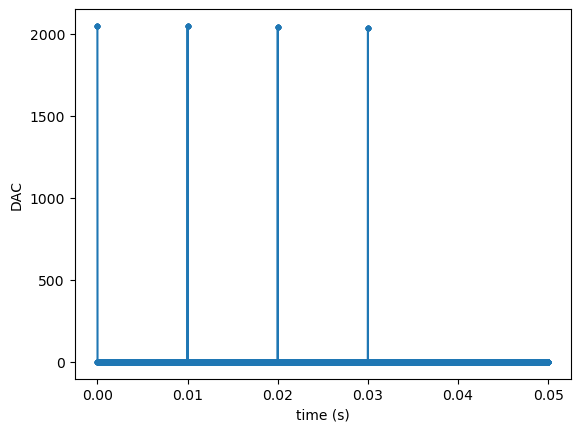

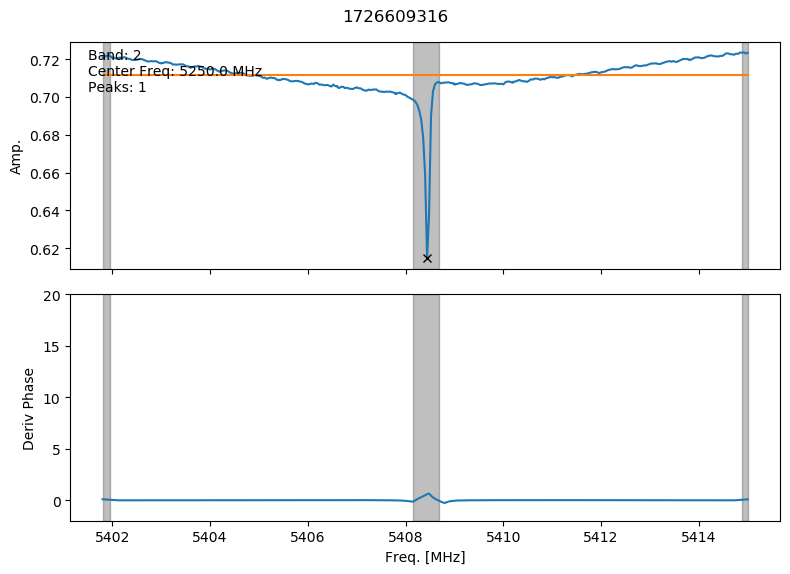

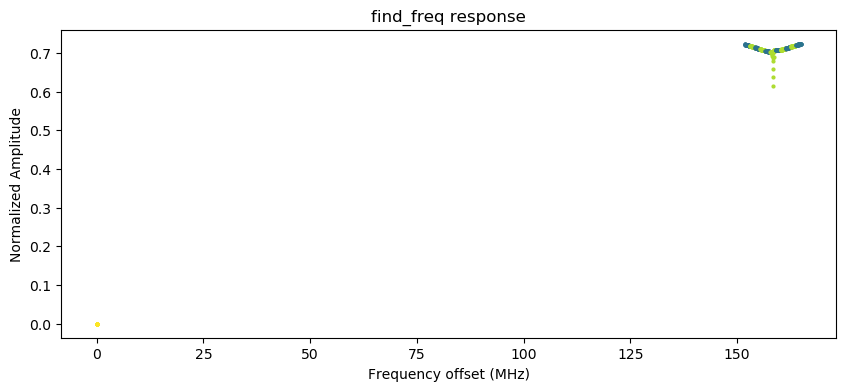

S.which_on(2)=[66]
turning off non resonant channels...
S.which_on(2)=[66]
sb=387 sbc=158.4 bc=5250.0
fr=5408.453999948501 MHz
S.get_eta_mag_scaled_channel=0.36224995119938275
S.get_eta_phase_degree_channel=179.6621181067236
sb=387 sbc=158.4 bc=5250.0
fr=5408.453997945785 MHz
Fr from fit  [GHz]: 5408.462410652087
Fr min curve [GHz]: 5408.454
fine_pars: {'f0': 5408.462410652087, 'Qr': 63428.81787495312, 'phi': -0.3397819270376774, 'zOff': (0.012518500504698517+0.7042442903408928j), 'QcHat': 436533.5861520722, 'tau': (6.611607852122194e-05-0.00011323350950987608j), 'Qc': 463004.78872373333}
Qi: 54739.45863937391
Fit dictionary parameters:   {'f0': 5408.462410652087, 'Qr': 63428.81787495312, 'phi': -0.3397819270376774, 'zOff': (0.012518500504698517+0.7042442903408928j), 'QcHat': 436533.5861520722, 'tau': (6.611607852122194e-05-0.00011323350950987608j), 'Qc': 463004.78872373333}
Plotting iq, fit, and fr in ideal basis
Plotting iq, fit, and fr in resonator basis
turned AWG output off
taking

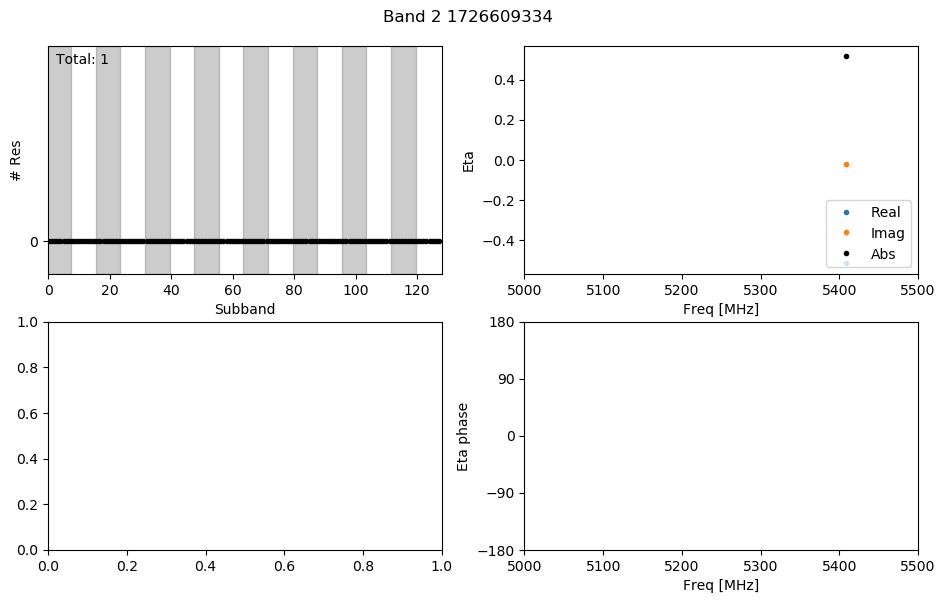

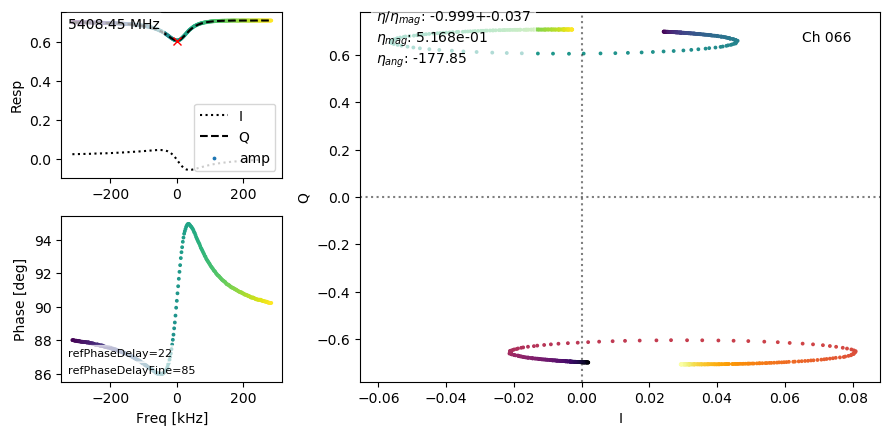

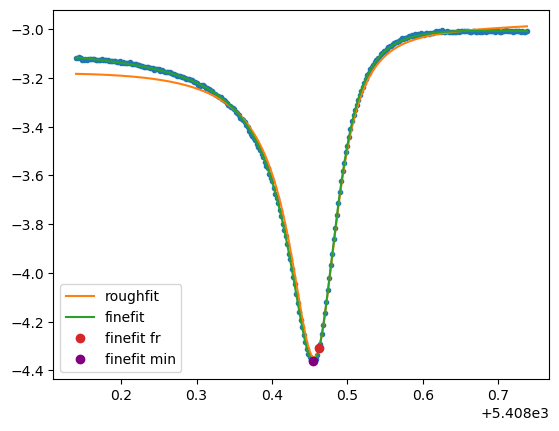

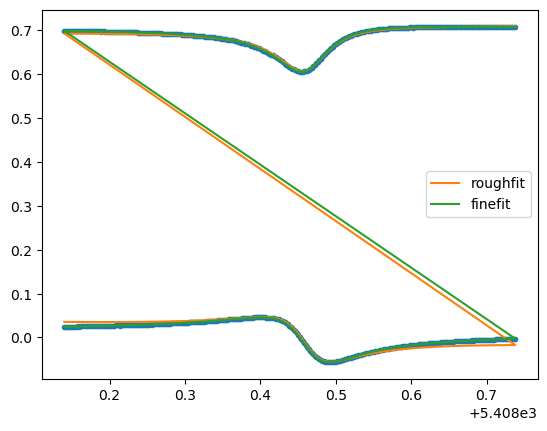

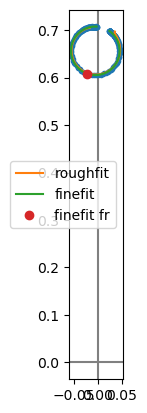

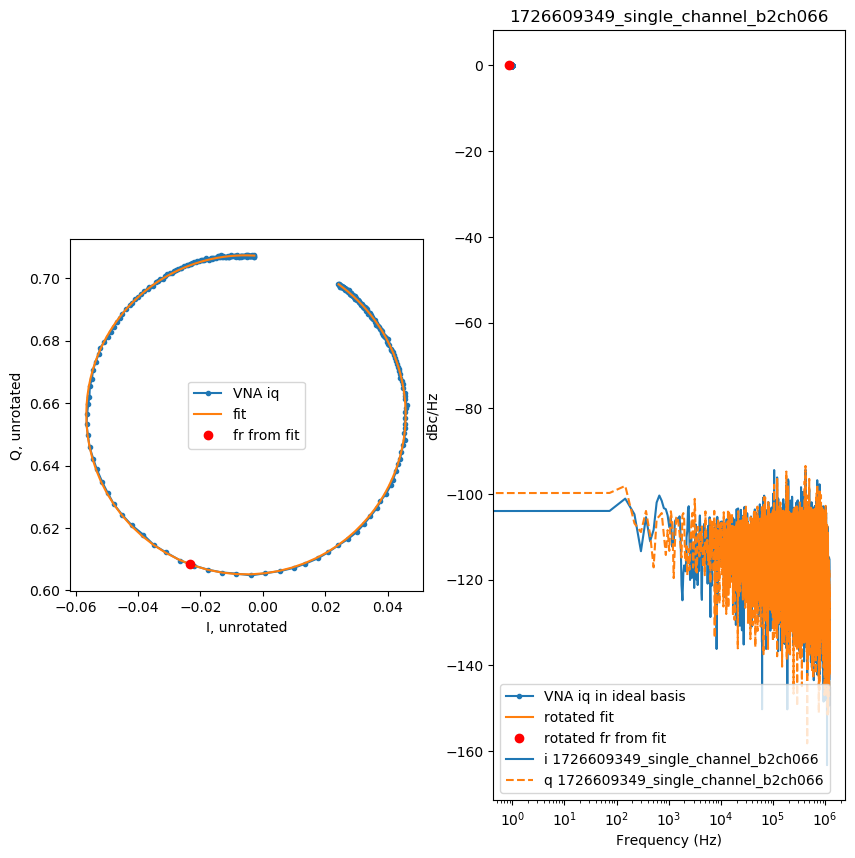

<Figure size 640x480 with 0 Axes>

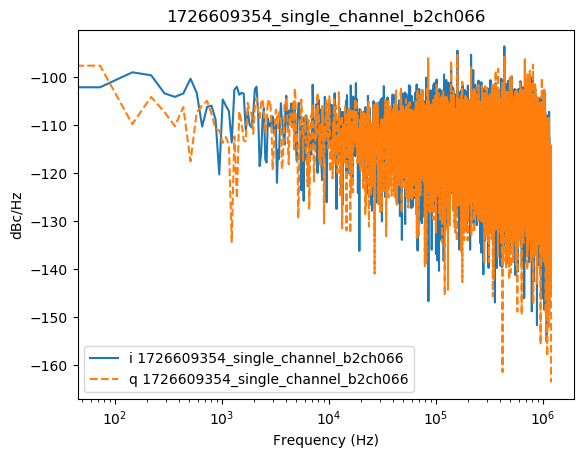

<Figure size 640x480 with 0 Axes>

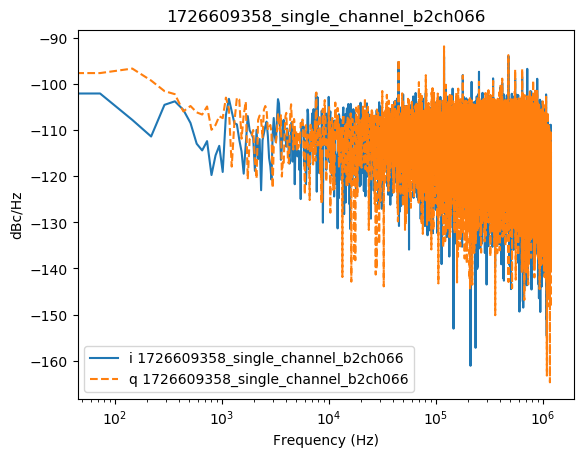

<Figure size 640x480 with 0 Axes>

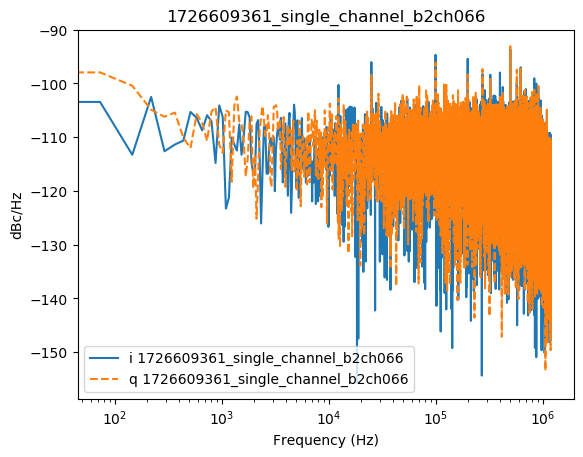

<Figure size 640x480 with 0 Axes>

Turning on LED...
turned AWG output on
taking on resonance data


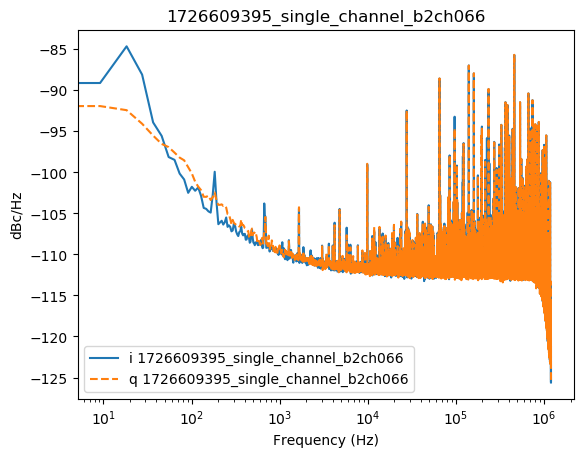

<Figure size 640x480 with 0 Axes>

turned AWG output off


In [31]:
##################  Define USER SET Parameters
# AWG: 
WVFM_DURATION_S = 50e-3  
WVFM_SAMPLES = 50000
WVFM_SAMP_RATE_HZ = WVFM_SAMPLES / WVFM_DURATION_S

VOLT = 0.82
FREQ = 1/WVFM_DURATION_S #HZ

PULSE_DURATION_US = [10 , 10, 10, 10, 10] # Duration of each square wave in microseconds
AMPLITUDES = [1, .999, .998, .995, 0]  # Example amplitudes for the 5 segments

AWG_settings = {}
AWG_settings["pulse_duration_us"] = PULSE_DURATION_US
AWG_settings["amplitudes"] = AMPLITUDES
AWG_settings["wvfm_samp_rate_hz"] = WVFM_SAMP_RATE_HZ
AWG_settings["wvfm_duration_s"] = WVFM_DURATION_S
AWG_settings["voltage"] = VOLT
AWG_settings['impedance'] = query_instrument(awg, 'OUTPut:LOAD?', response_return=True)

waveform_string = create_waveform(PULSE_DURATION_US, AMPLITUDES, WVFM_SAMP_RATE_HZ, WVFM_DURATION_S, dac_max=2047, plot=True) 
DOWNLOAD_2_VOLATILE = False  #did you make changes in wvfm srtring 


# LED: 
LED_settings = {}
LED_settings['P/N'] = 'M625F2'
LED_settings['wavelength (nm)'] = 625
LED_settings['current limit (mA)'] = 500
LED_settings['Vmax (V)'] = 5
LED_settings['mod coeff  (mA/V)'] = 400
LED_settings['input impedance (kOhm)'] = 10



# SMuRF: 
SMURF_SAMP_RATE_HZ = S.get_channel_frequency_mhz(BAND) * 1.0E6
POWERS = [13]
NSAMP = 2**25
NSAMP_CHAR = 2**15
F_SHIFT_MHZ= 0.02
CHAR_OFFSETS = [-2, -1, 1,2]

tunefiles = {}
 

if DOWNLOAD_2_VOLATILE == True:
    # load to volatile memory: 
    print('downloading waveform to volatile memory')
    start_time = time.time()
    send_command(awg, 'DATA:DEL')
    send_command(awg,f'DATA:DAC VOLATILE,{waveform_string}')  # Upload arbitrary waveform
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    print(f"Time taken to download wavefunction: {elapsed_time:.6f} seconds")


for tone_power in POWERS:
    
    slowInitializeMkidSmurf(S,BAND,tone_power,ff_freq_min=152,ff_freq_max=164, amp_cut=0.05, grad_descent_averages=100, eta_scan_averages=1000)
    tunefiles[tone_power]=S.tune_file

    channel = S.which_on(BAND)[0]
    S.set_feedback_enable_channel(BAND,channel,0)
    S.channel_off(BAND, channel)
    
    ## This will get f0 and also plot the tunefile / fit
    fit_dict, fine_errs = fit_data( tunefiles[tone_power], BAND)
    res_freq=fit_dict['f0']

    char_avgs = {}
    send_command(awg,'OUTP OFF')  # Enable the output
    print("turned AWG output off")
    print("taking characterization tones:")
    for f_offs in CHAR_OFFSETS:
        new_sub_band_center_MHz = res_freq + F_SHIFT_MHZ * f_offs 
        S.set_fixed_tone(new_sub_band_center_MHz, tone_power)
        iq, sync, filename = takeDebugData_new(S, BAND, channel, NSAMP_CHAR)
        avg = np.mean(iq)
        char_avgs[new_sub_band_center_MHz] = [avg.real, avg.imag]
        for ch in S.which_on(BAND):
            S.channel_off(BAND, ch)
                
    print("Turning on LED...")
    ## send_command(awg,'FUNC USER')  # Set to arbitrary waveform mode
    send_command(awg,'FUNC:USER VOLATILE')  # Select the uploaded waveform
    send_command(awg,f'FREQ {FREQ}')  # Set frequency to 500 Hz
    send_command(awg,f'VOLT {VOLT}')  # Set amplitude to 1 V
    send_command(awg,'OUTP ON')  # Enable the output
    print('turned AWG output on')
    
    sleep(30)
    print("taking on resonance data")
    S.set_fixed_tone(res_freq, tone_power)
    iq, sync, filename=takeDebugData_new(S, BAND, channel, NSAMP)
    logDebugData(S, BAND, channel, iq, sync, filename, S.tune_file,'Olaf12b', char_avgs, awg_settings=AWG_settings, led_settings=LED_settings)
    send_command(awg,'OUTP OFF')  # Enable the output
    print("turned AWG output off") 
    
    for ch in S.which_on(BAND):
        S.channel_off(BAND, ch)


## Sequence 3

+1.0000000000000E+04
()


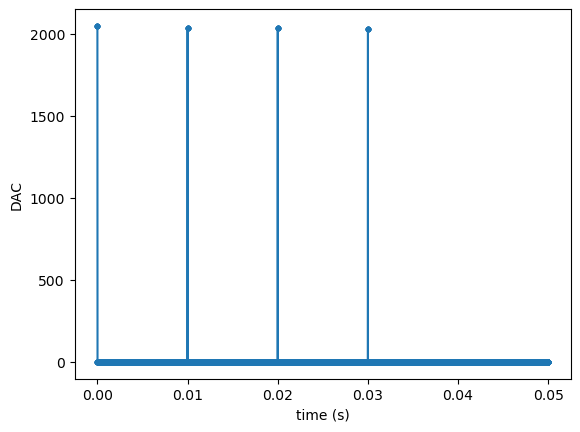

downloading waveform to volatile memory
Time taken to download wavefunction: 417.004072 seconds


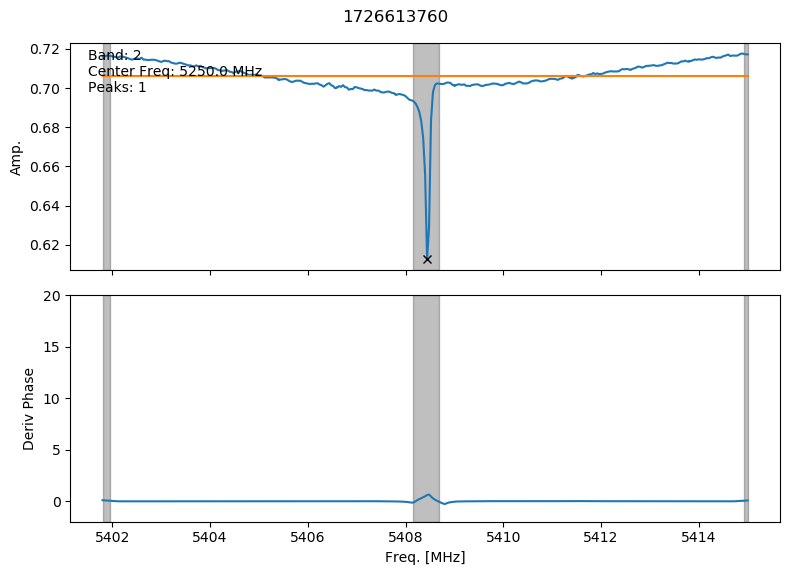

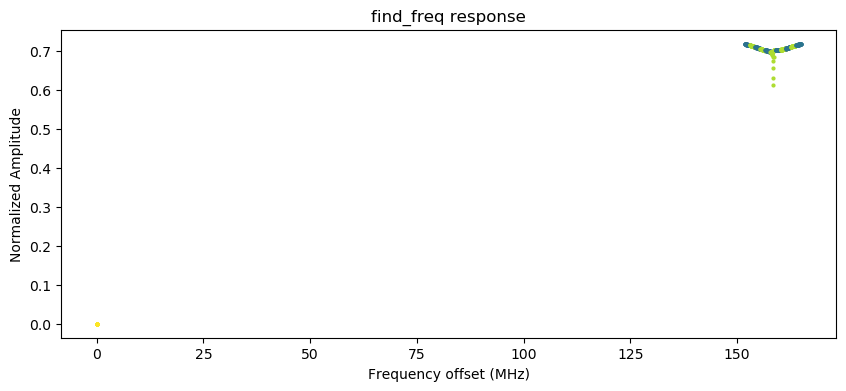

S.which_on(2)=[66]
turning off non resonant channels...
S.which_on(2)=[66]
sb=387 sbc=158.4 bc=5250.0
fr=5408.457999944687 MHz
S.get_eta_mag_scaled_channel=0.3588194544031355
S.get_eta_phase_degree_channel=176.05950759055358
sb=387 sbc=158.4 bc=5250.0
fr=5408.457970619202 MHz
Fr from fit  [GHz]: 5408.463789892735
Fr min curve [GHz]: 5408.455999999999
fine_pars: {'f0': 5408.463789892735, 'Qr': 63792.21147906768, 'phi': -0.33888673017423376, 'zOff': (-0.023212236944523325+0.6991253230825476j), 'QcHat': 436198.78839744476, 'tau': (0.00013578499412653667-0.0002126365473884031j), 'Qc': 462503.5176203726}
Qi: 54993.47570657495
Fit dictionary parameters:   {'f0': 5408.463789892735, 'Qr': 63792.21147906768, 'phi': -0.33888673017423376, 'zOff': (-0.023212236944523325+0.6991253230825476j), 'QcHat': 436198.78839744476, 'tau': (0.00013578499412653667-0.0002126365473884031j), 'Qc': 462503.5176203726}
Plotting iq, fit, and fr in ideal basis
Plotting iq, fit, and fr in resonator basis
turned AWG outp

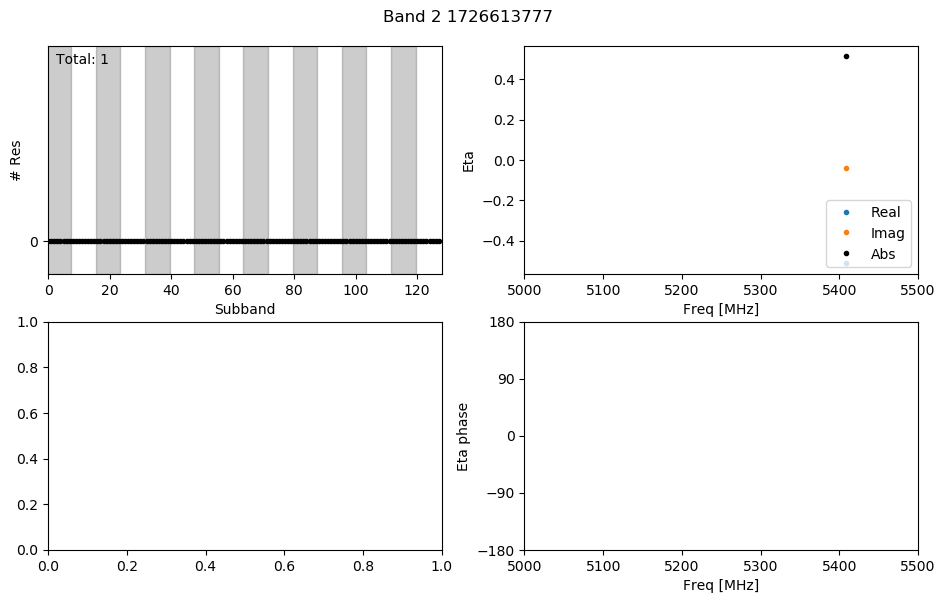

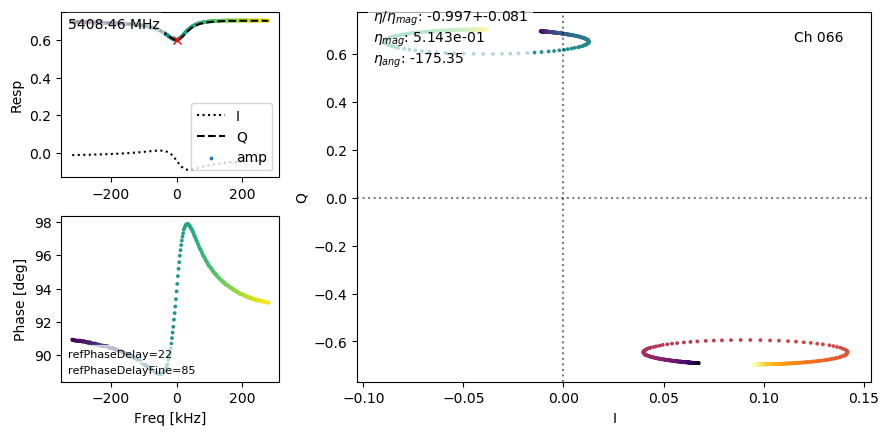

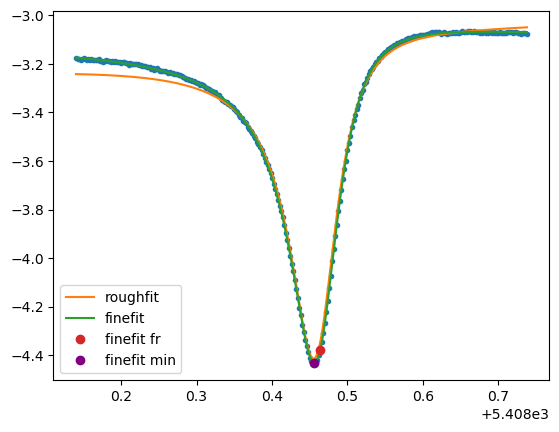

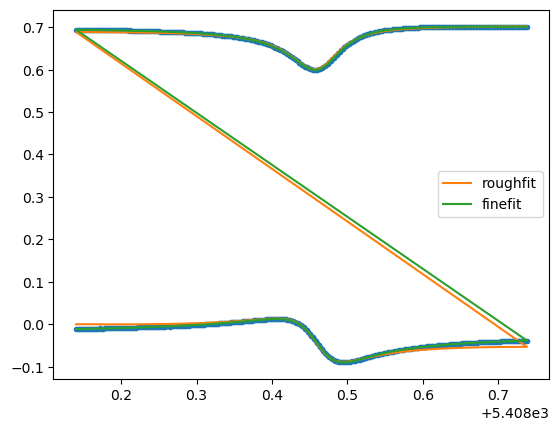

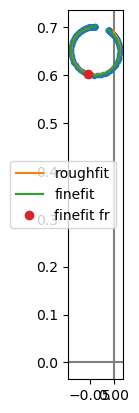

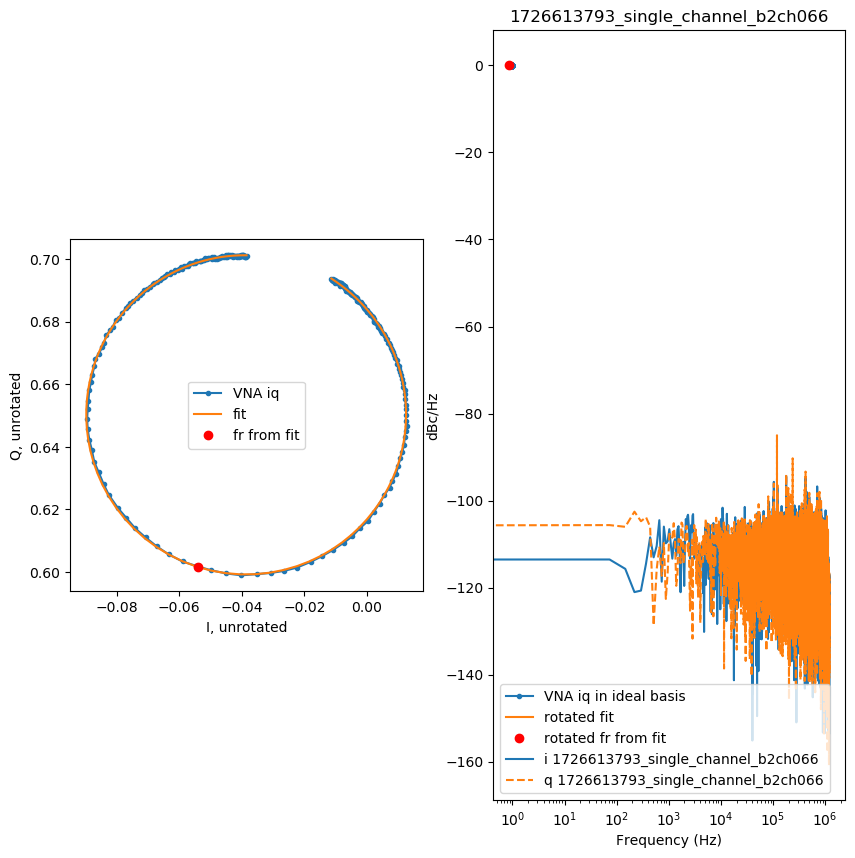

<Figure size 640x480 with 0 Axes>

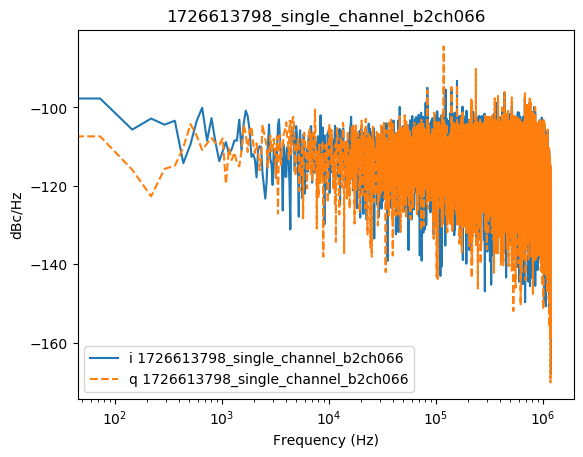

<Figure size 640x480 with 0 Axes>

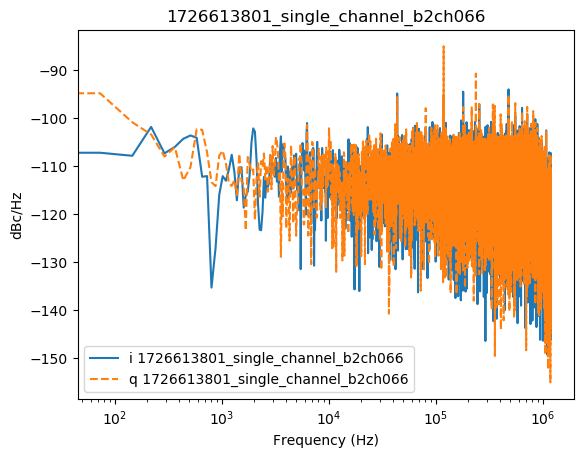

<Figure size 640x480 with 0 Axes>

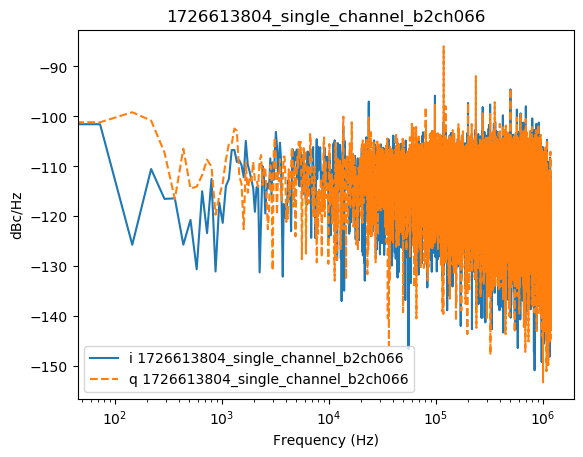

<Figure size 640x480 with 0 Axes>

Turning on LED...
turned AWG output on
taking on resonance data


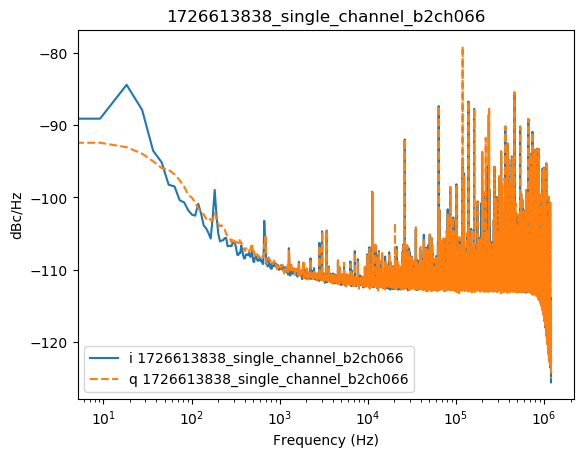

<Figure size 640x480 with 0 Axes>

turned AWG output off


In [33]:
##################  Define USER SET Parameters
# AWG: 
WVFM_DURATION_S = 50e-3  
WVFM_SAMPLES = 50000
WVFM_SAMP_RATE_HZ = WVFM_SAMPLES / WVFM_DURATION_S

VOLT = 0.83
FREQ = 1/WVFM_DURATION_S #HZ

PULSE_DURATION_US = [10 , 10, 10, 10, 10] # Duration of each square wave in microseconds
AMPLITUDES = [1, .994, .993, .992, 0]  # Example amplitudes for the 5 segments

AWG_settings = {}
AWG_settings["pulse_duration_us"] = PULSE_DURATION_US
AWG_settings["amplitudes"] = AMPLITUDES
AWG_settings["wvfm_samp_rate_hz"] = WVFM_SAMP_RATE_HZ
AWG_settings["wvfm_duration_s"] = WVFM_DURATION_S
AWG_settings["voltage"] = VOLT
AWG_settings['impedance'] = query_instrument(awg, 'OUTPut:LOAD?', response_return=True)

waveform_string = create_waveform(PULSE_DURATION_US, AMPLITUDES, WVFM_SAMP_RATE_HZ, WVFM_DURATION_S, dac_max=2047, plot=True) 
DOWNLOAD_2_VOLATILE = True  #did you make changes in wvfm srtring 


# LED: 
LED_settings = {}
LED_settings['P/N'] = 'M625F2'
LED_settings['wavelength (nm)'] = 625
LED_settings['current limit (mA)'] = 500
LED_settings['Vmax (V)'] = 5
LED_settings['mod coeff  (mA/V)'] = 400
LED_settings['input impedance (kOhm)'] = 10



# SMuRF: 
SMURF_SAMP_RATE_HZ = S.get_channel_frequency_mhz(BAND) * 1.0E6
POWERS = [13]
NSAMP = 2**25
NSAMP_CHAR = 2**15
F_SHIFT_MHZ= 0.02
CHAR_OFFSETS = [-2, -1, 1,2]

tunefiles = {}
 

if DOWNLOAD_2_VOLATILE == True:
    # load to volatile memory: 
    print('downloading waveform to volatile memory')
    start_time = time.time()
    send_command(awg, 'DATA:DEL')
    send_command(awg,f'DATA:DAC VOLATILE,{waveform_string}')  # Upload arbitrary waveform
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    print(f"Time taken to download wavefunction: {elapsed_time:.6f} seconds")


for tone_power in POWERS:
    
    slowInitializeMkidSmurf(S,BAND,tone_power,ff_freq_min=152,ff_freq_max=164, amp_cut=0.05, grad_descent_averages=100, eta_scan_averages=1000)
    tunefiles[tone_power]=S.tune_file

    channel = S.which_on(BAND)[0]
    S.set_feedback_enable_channel(BAND,channel,0)
    S.channel_off(BAND, channel)
    
    ## This will get f0 and also plot the tunefile / fit
    fit_dict, fine_errs = fit_data( tunefiles[tone_power], BAND)
    res_freq=fit_dict['f0']

    char_avgs = {}
    send_command(awg,'OUTP OFF')  # Enable the output
    print("turned AWG output off")
    print("taking characterization tones:")
    for f_offs in CHAR_OFFSETS:
        new_sub_band_center_MHz = res_freq + F_SHIFT_MHZ * f_offs 
        S.set_fixed_tone(new_sub_band_center_MHz, tone_power)
        iq, sync, filename = takeDebugData_new(S, BAND, channel, NSAMP_CHAR)
        avg = np.mean(iq)
        char_avgs[new_sub_band_center_MHz] = [avg.real, avg.imag]
        for ch in S.which_on(BAND):
            S.channel_off(BAND, ch)
                
    print("Turning on LED...")
    ## send_command(awg,'FUNC USER')  # Set to arbitrary waveform mode
    send_command(awg,'FUNC:USER VOLATILE')  # Select the uploaded waveform
    send_command(awg,f'FREQ {FREQ}')  # Set frequency to 500 Hz
    send_command(awg,f'VOLT {VOLT}')  # Set amplitude to 1 V
    send_command(awg,'OUTP ON')  # Enable the output
    print('turned AWG output on')
    
    sleep(30)
    print("taking on resonance data")
    S.set_fixed_tone(res_freq, tone_power)
    iq, sync, filename=takeDebugData_new(S, BAND, channel, NSAMP)
    logDebugData(S, BAND, channel, iq, sync, filename, S.tune_file,'Olaf12b', char_avgs, awg_settings=AWG_settings, led_settings=LED_settings)
    send_command(awg,'OUTP OFF')  # Enable the output
    print("turned AWG output off") 
    
    for ch in S.which_on(BAND):
        S.channel_off(BAND, ch)


## Take some off-resonance data, with no LED

5250.0
[0]


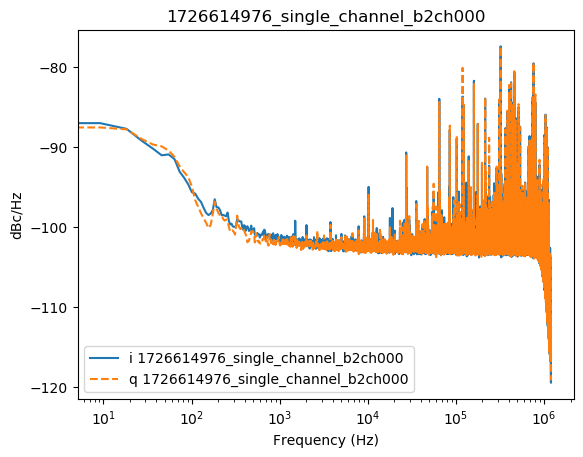

<Figure size 640x480 with 0 Axes>

5300.0
[168]


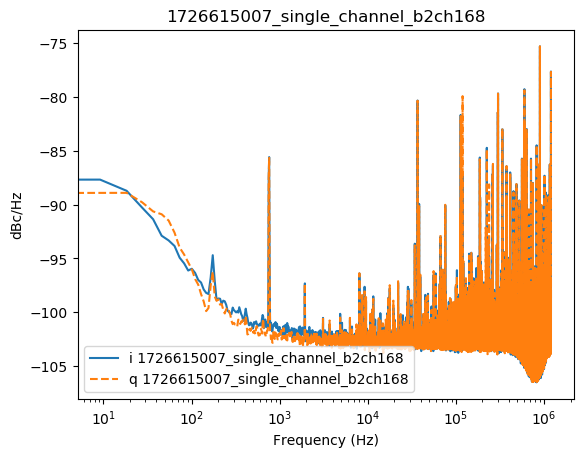

<Figure size 640x480 with 0 Axes>

5350.0
[404]


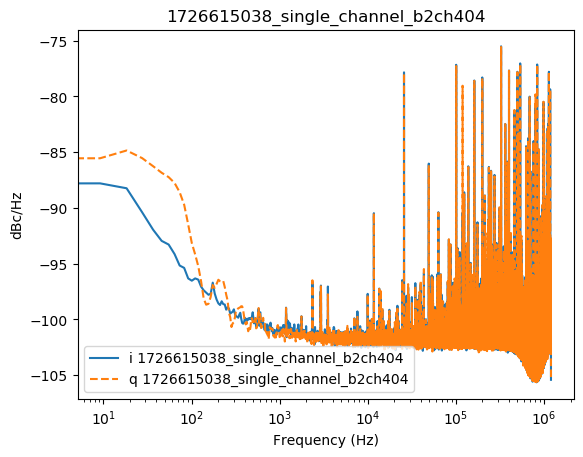

<Figure size 640x480 with 0 Axes>

5400.0
[380]


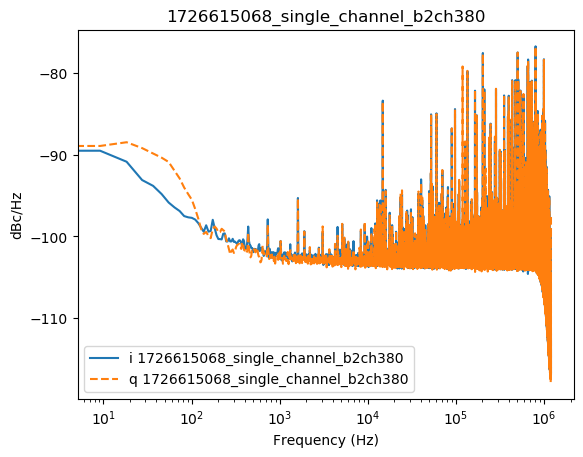

<Figure size 640x480 with 0 Axes>

5450.0
[458]


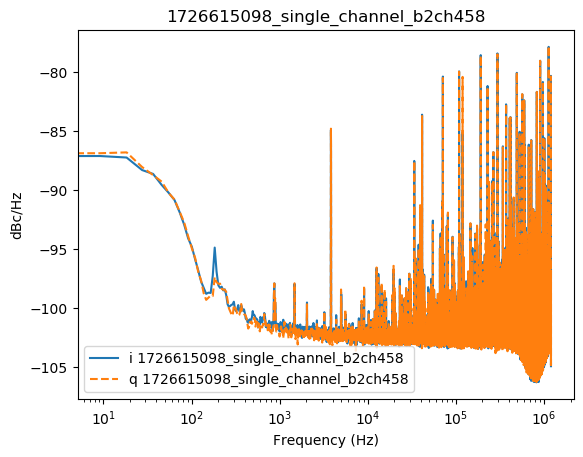

<Figure size 640x480 with 0 Axes>

5408.463789892735
[66]


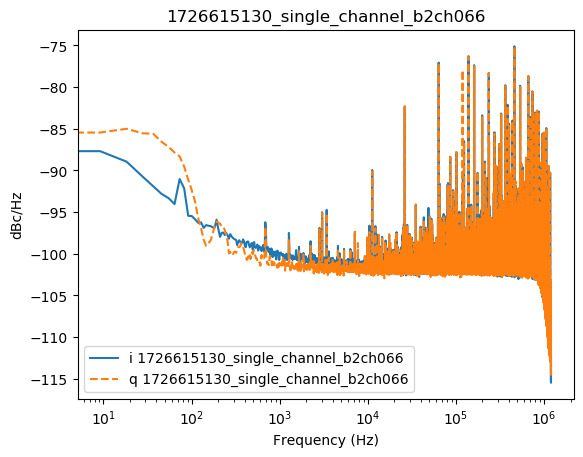

<Figure size 640x480 with 0 Axes>

5250.0
[0]


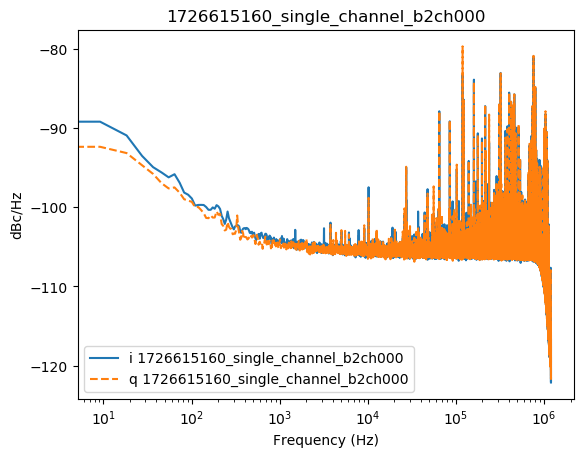

<Figure size 640x480 with 0 Axes>

5300.0
[168]


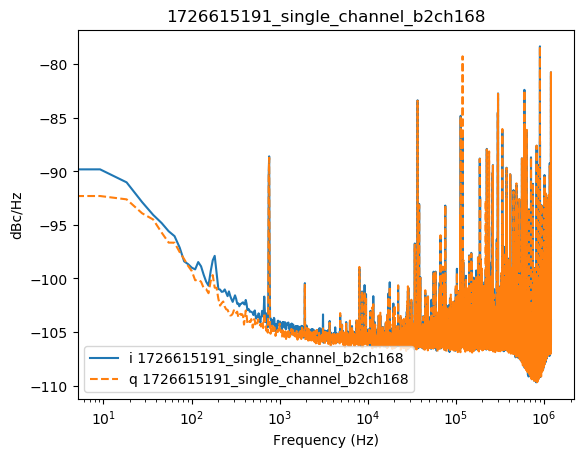

<Figure size 640x480 with 0 Axes>

5350.0
[404]


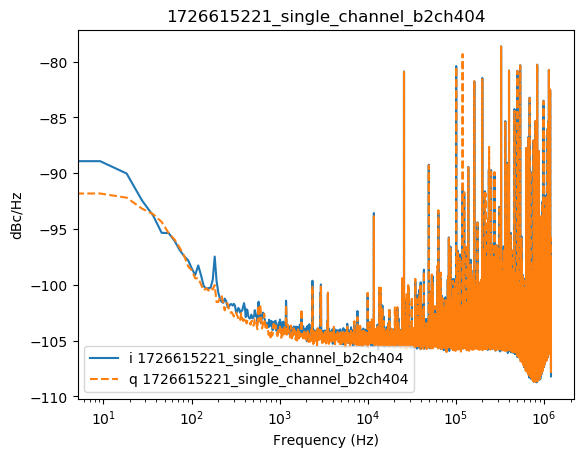

<Figure size 640x480 with 0 Axes>

5400.0
[380]


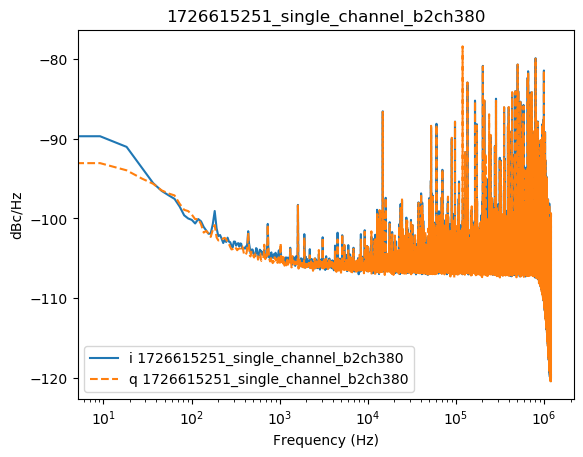

<Figure size 640x480 with 0 Axes>

5450.0
[458]


In [ ]:
freq_array = np.concatenate((np.linspace(5250, 5250+200,5), np.array([res_freq])), axis=0)
POWERS = [10, 11, 12, 13]
channel=0
NSAMP=2**25
count = 0 
full_filenames = []
for tone_power in POWERS:
    for freq in freq_array:
        print(freq)
        S.set_fixed_tone(freq, tone_power)
        channel = S.which_on(BAND)[0]
        print(S.which_on(BAND))
        # Take I/Q data
        iq, sync, filename = takeDebugData_new(S, BAND, channel, nsamp=NSAMP, plot=True, welch_nperseg=2**18)
        logDebugData(S, BAND, channel, iq, sync, filename, S.tune_file, 'Olaf12b')
        full_filenames.append(filename)
        for ch in S.which_on(BAND):
            S.channel_off(BAND, ch)

In [38]:
for ch in S.which_on(BAND):
    S.channel_off(BAND, ch)

In [ ]:
## Close portal to AWG:
awg.close()

In [78]:
S.which_on(2)

array([0])

### Some rfsoc ADC debugging: 

In [33]:
S.set_fixed_tone(5250, 12)
#S.find_freq(2,start_freq=152,stop_freq=164,make_plot=True,show_plot=True,amp_cut=0.05,rolling_med=False) #amp cut decides what you count for a resonator 

(2, 0)

In [38]:
sys.argv[1]=2; exec(open('../shawn/fill_band.py').read())

filling bands 2
-> Restricting nchan to 231.


/usr/local/src/pysmurf/python/pysmurf/client/util/smurf_util.py:1630: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_fn)


array([ 3229. +297.j, -2061.-3419.j, -3958.+1302.j, ...,  -384.+5055.j,
        3290. +391.j, -2183. -109.j])

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


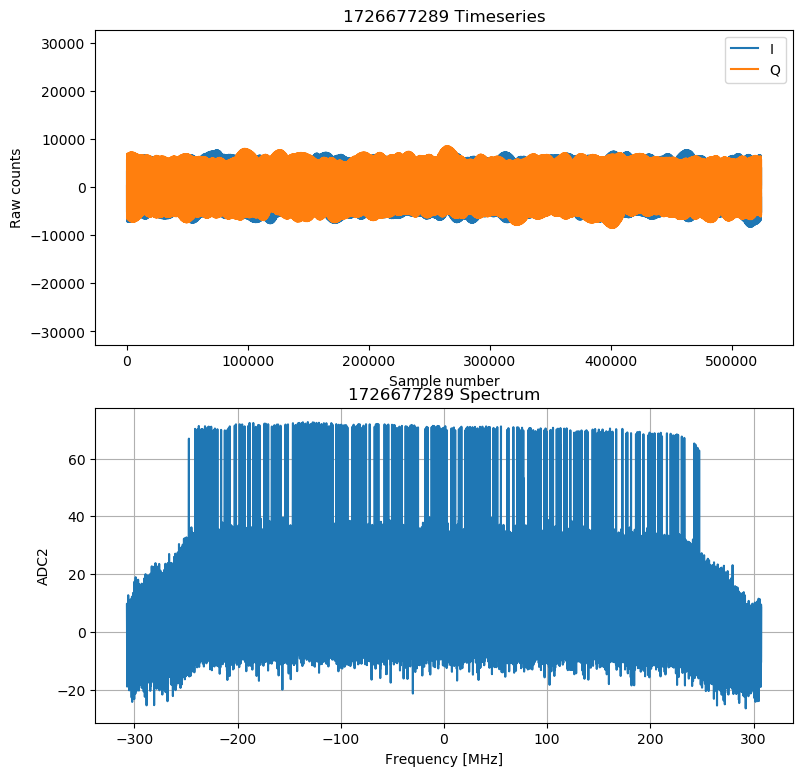

In [39]:
S.read_adc_data(2, make_plot=True, show_plot=True)

In [31]:
S.check_adc_saturation(2)

False

CA.Client.Exception...............................................
    Context: "localhost:40817"
    Source File: ../cac.cpp line 1223
    Current Time: Wed Sep 18 2024 16:39:52.466456921
..................................................................


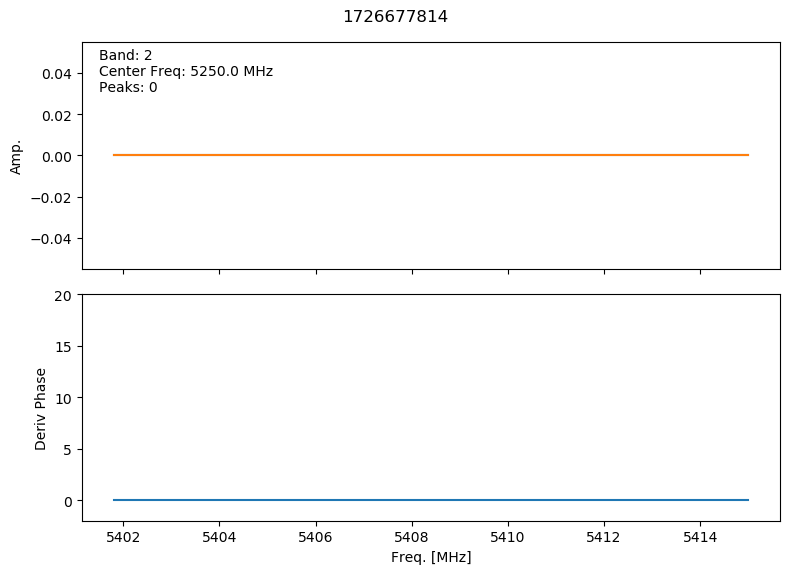

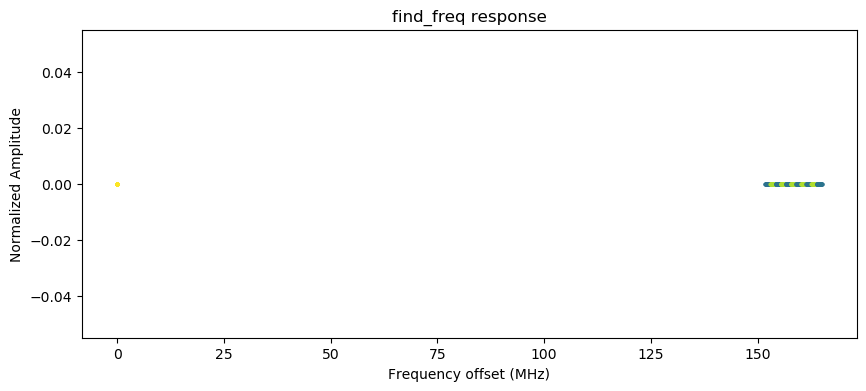

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]))

In [46]:
S.find_freq(2,start_freq=152,stop_freq=164,make_plot=True,show_plot=True,amp_cut=0.05,rolling_med=False) #amp cut decides what you count for a resonator 

## Tone power testing... 
setup: output of rfsoc, with a warm amplifier, into SA

In [64]:
S.set_fixed_tone(5250, 12) ##SA reads -15 dBm 

(2, 0)

In [70]:
S.set_amplitude_scale_channel(2, 0, 13) #reads -23 dBm 
S.get_amplitude_scale_channel(2,  0)

13

In [69]:
S.set_amplitude_scale_channel(2, 0, 12) # reads -26 dBm 
S.get_amplitude_scale_channel(2,  0)

12

In [71]:
S.set_amplitude_scale_channel(2, 0, 11) # reads -30 dBm 
S.get_amplitude_scale_channel(2,  0)

11

setup: output of rfsoc into SA

In [72]:
S.set_amplitude_scale_channel(2, 0, 13) # reads -43 dBm
S.get_amplitude_scale_channel(2,  0)

13

In [76]:
S.set_amplitude_scale_channel(2, 0, 12) # reads -46 dBm 
S.get_amplitude_scale_channel(2,  0)

12

In [ ]:
S.set_amplitude_scale_channel(2, 0, 11) #reads -49 dBm
S.get_amplitude_scale_channel(2,  0)

In [66]:
?S.set_amplitude_scale_channel

Signature: S.set_amplitude_scale_channel(band, channel, val, **kwargs)
Docstring:         
File:      /usr/local/src/pysmurf/python/pysmurf/client/command/smurf_command.py
Type:      method

In [79]:
S.all_off()

In [80]:
S.set_fixed_tone(5250, 12)

(2, 0)

# Shawn wants eta comparisons with known power... 


## config: 


RFsoc out (tone power 12) -> B1 ->60 dB attn > kid -> cold hemt (37 dB)  -> warm hemt (~20dB)  -> RFsoc in 

In [ ]:
S.estimate_phase_delay(2,freq_min=-1200000,freq_max=1200000)

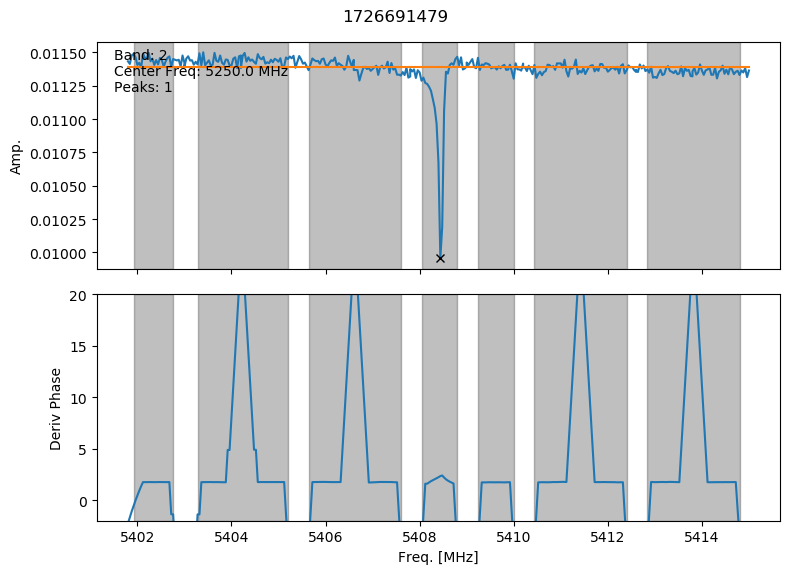

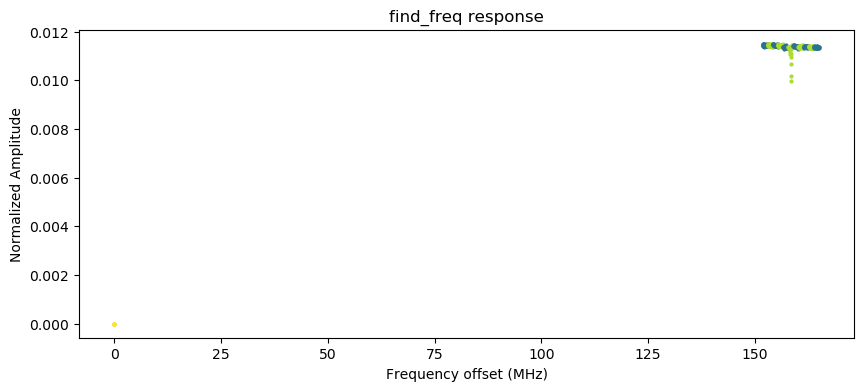

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]))

In [108]:
BAND = 2 
TONEPOWER = 12
UCATT = 0 
AMPCUT = 0.05
#S.set_att_uc(BAND,UCATT)
#print('using tone power before', tone_power)
S.find_freq(BAND,tone_power=TONEPOWER, start_freq=152,stop_freq=164,make_plot=True,show_plot=True,amp_cut=AMPCUT,rolling_med=False) #amp cut decides what you count for a resonator 

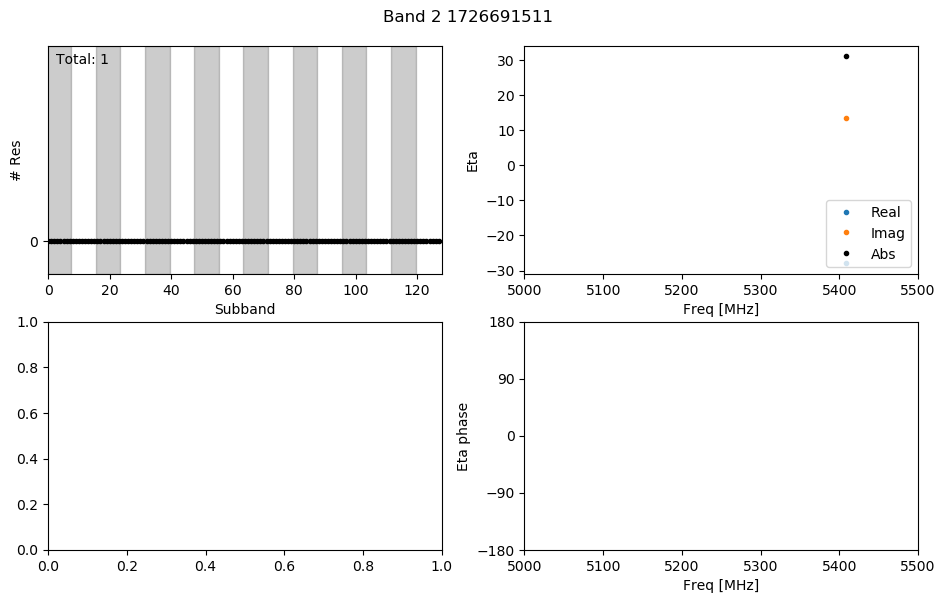

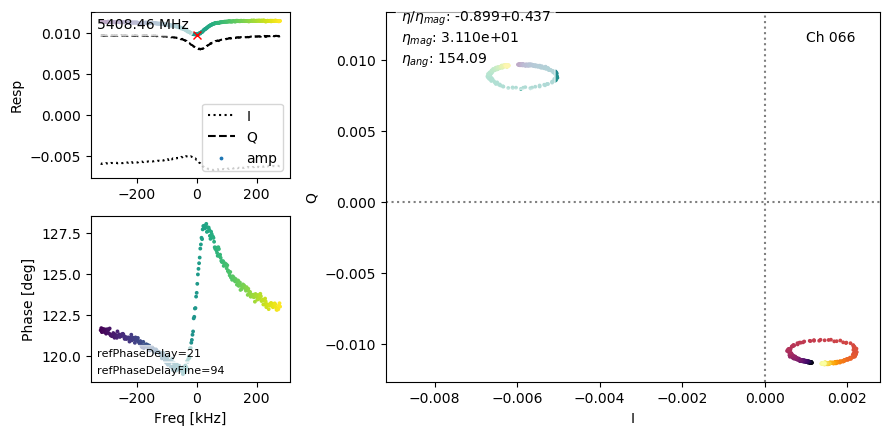

In [109]:
S.setup_notches(BAND, tone_power=TONEPOWER, new_master_assignment=True)
S.plot_tune_summary(BAND,eta_scan=True,show_plot=True)


In [110]:
print(S.which_on(BAND))
for ch in S.which_on(BAND):
    if ch != 66: 
        S.channel_off(BAND, ch)
print(S.which_on(BAND))

[66]
[66]


In [111]:
print(S.tune_file)

/data/smurf_data/tune/1726691505_tune.npy


In [112]:
tune_dict = load_tune_file(S.tune_file, BAND)
print(tune_dict.keys())
print(tune_dict['fr'])

dict_keys(['fname', 'r', 'freqs', 'fr'])
5408.46


Fr from fit  [GHz]: 5408.465013708155
Fr min curve [GHz]: 5408.458
fine_pars: {'f0': 5408.465013708155, 'Qr': 63102.15754257108, 'phi': -0.328696233243762, 'zOff': (-0.006063781940619684+0.009686153722902855j), 'QcHat': 433159.3030334687, 'tau': (0.004215613624552146-0.0003304052441888276j), 'Qc': 457660.614413683}
Qi: 54401.64419027242
Fit dictionary parameters:   {'f0': 5408.465013708155, 'Qr': 63102.15754257108, 'phi': -0.328696233243762, 'zOff': (-0.006063781940619684+0.009686153722902855j), 'QcHat': 433159.3030334687, 'tau': (0.004215613624552146-0.0003304052441888276j), 'Qc': 457660.614413683}
Plotting iq, fit, and fr in ideal basis
Plotting iq, fit, and fr in resonator basis


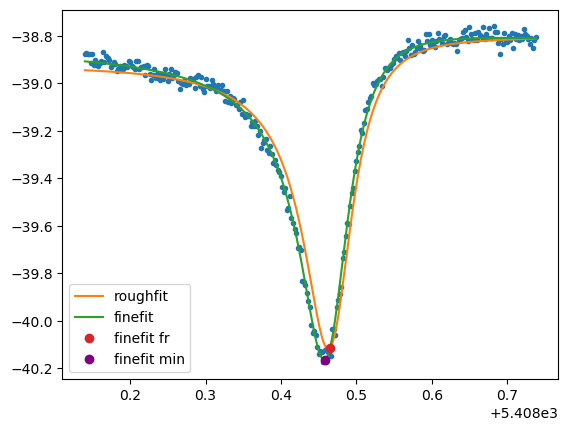

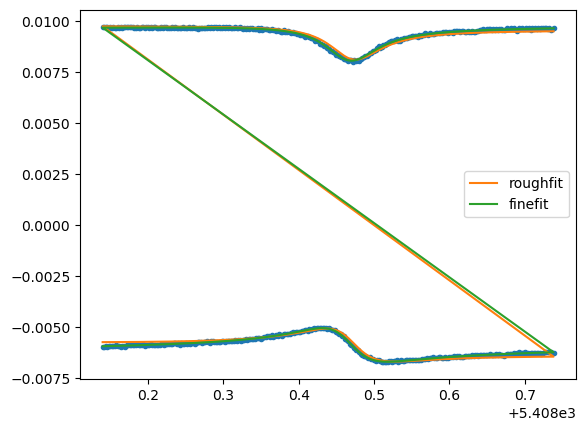

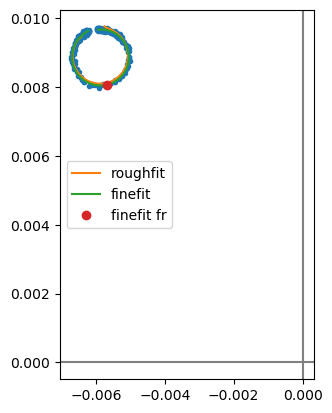

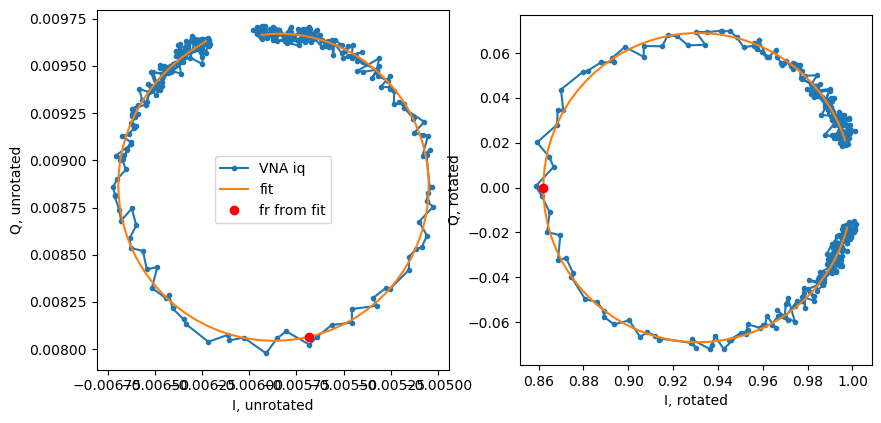

In [113]:
fit_dict, fine_errs = fit_data(S.tune_file, BAND)

## config: 


RFsoc out (tone power 12) -> Warm amp (ZX60-83LN-S+) -> B1 ->60 dB attn > kid -> cold hemt (37 dB)  -> warm hemt (~20dB)  -> RFsoc in 

Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function set_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function set_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_dc called, but not implemented on RFSoC.  Skipping call and returning None!
Function get_att_uc called, but not implemented on RFSoC.  Skipping ca

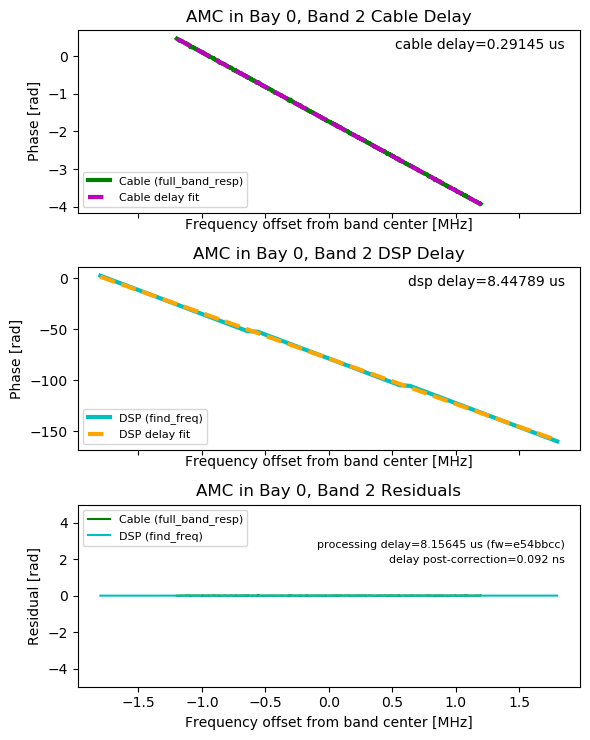

(8.447893608535152, 9.157494214885752e-05)

In [115]:
S.estimate_phase_delay(2,freq_min=-1200000,freq_max=1200000)

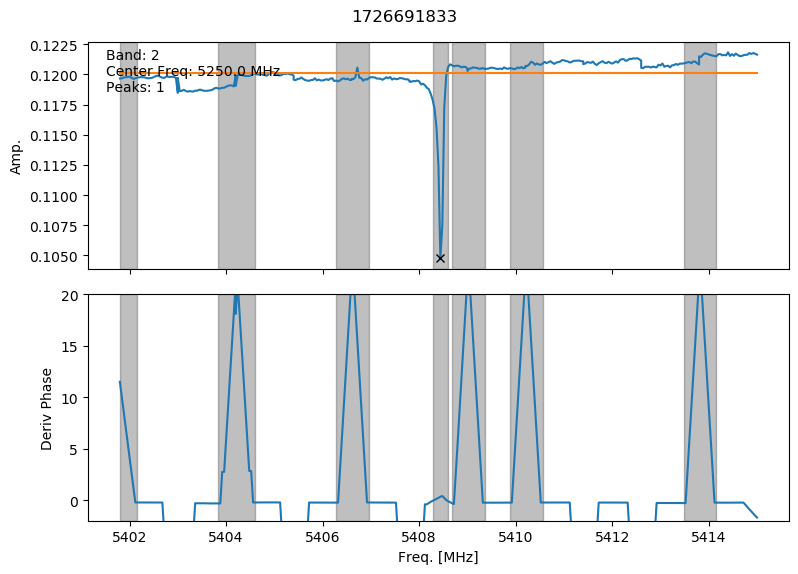

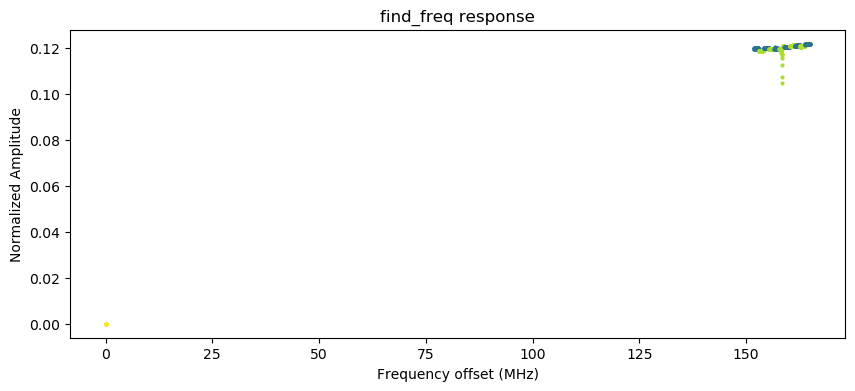

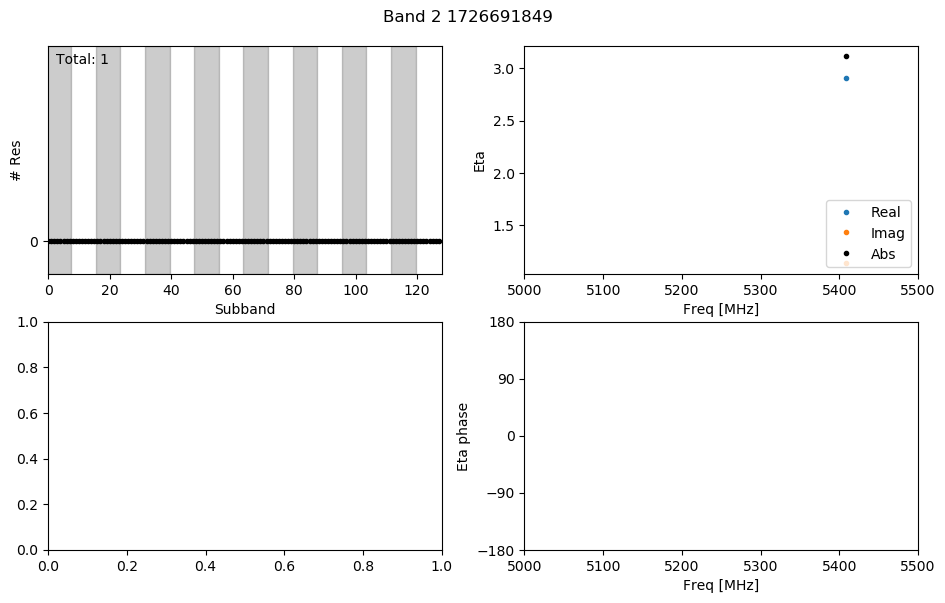

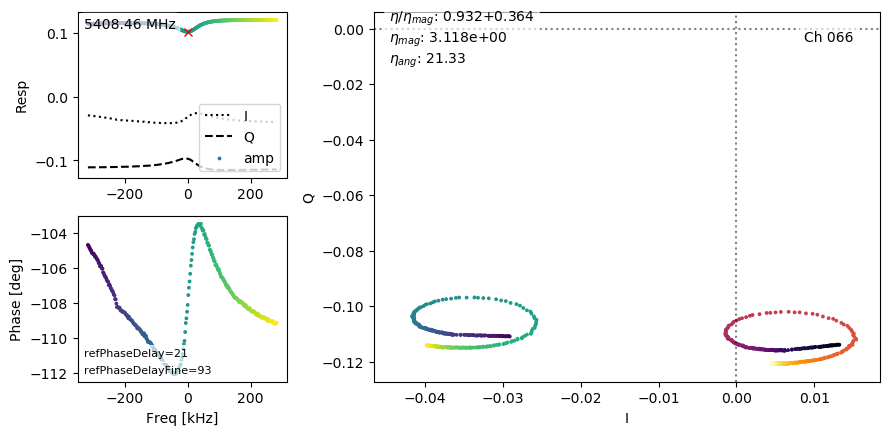

In [116]:
BAND = 2 
TONEPOWER = 12
UCATT = 0 
AMPCUT = 0.05
#S.set_att_uc(BAND,UCATT)
#print('using tone power before', tone_power)
S.find_freq(BAND,tone_power=TONEPOWER, start_freq=152,stop_freq=164,make_plot=True,show_plot=True,amp_cut=AMPCUT,rolling_med=False) #amp cut decides what you count for a resonato

S.setup_notches(BAND, tone_power=TONEPOWER, new_master_assignment=True)
S.plot_tune_summary(BAND,eta_scan=True,show_plot=True)


In [117]:
print(S.which_on(BAND))
for ch in S.which_on(BAND):
    if ch != 66: 
        S.channel_off(BAND, ch)
print(S.which_on(BAND))

[66]
[66]


Fr from fit  [GHz]: 5408.457388557424
Fr min curve [GHz]: 5408.454
fine_pars: {'f0': 5408.457388557424, 'Qr': 65202.432091289695, 'phi': -0.12361355813792366, 'zOff': (-0.03757699711299694-0.11310087303954847j), 'QcHat': 442760.4076481154, 'tau': (0.026817298389357022+0.01483608930307818j), 'Qc': 446164.8381816076}
Qi: 55673.76289372114
Fit dictionary parameters:   {'f0': 5408.457388557424, 'Qr': 65202.432091289695, 'phi': -0.12361355813792366, 'zOff': (-0.03757699711299694-0.11310087303954847j), 'QcHat': 442760.4076481154, 'tau': (0.026817298389357022+0.01483608930307818j), 'Qc': 446164.8381816076}
Plotting iq, fit, and fr in ideal basis
Plotting iq, fit, and fr in resonator basis


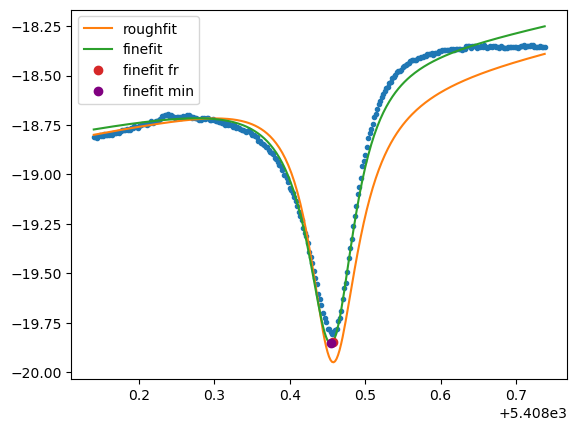

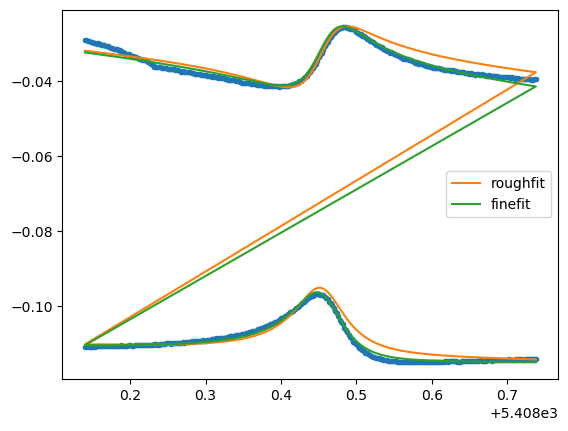

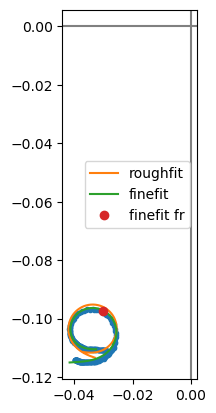

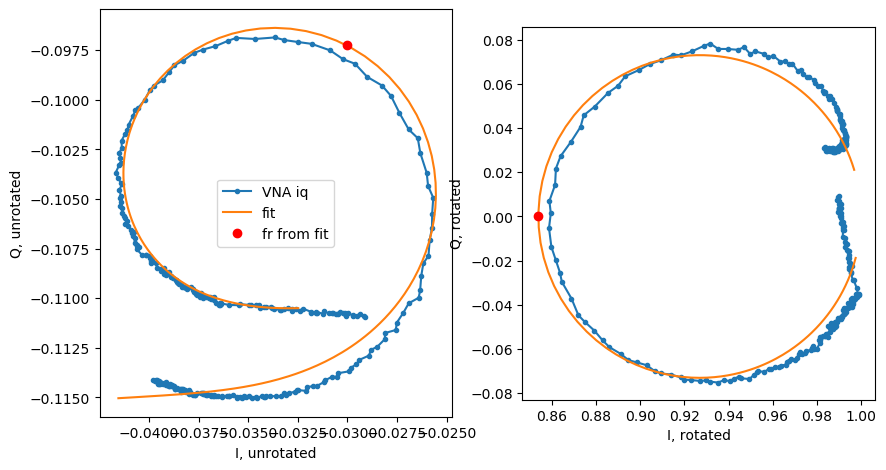

In [118]:
fit_dict, fine_errs = fit_data(S.tune_file, BAND)

In [119]:
for ch in S.which_on(BAND):
    S.channel_off(BAND, ch)